In [2]:
library(tidyverse)
library(GenomicRanges)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data

In [ ]:
base_dir <- "../../"
motif_pos_file <- paste0(base_dir, "/output/02-atac/03/motif.scores.JASPAR2020.pos.rds")
TF <- "SPI1"
valid_chr <- paste0("chr", c(as.character(1:22), "X"))
sample_ls <- c("HEK293T_P1A12_GFP_d100", "HEK293T_P3E11_SPI1_d005", "HEK293T_P3E10_SPI1_d025", "HEK293T_P3E9_SPI1_d050", "HEK293T_P3E8_SPI1_d075", "HEK293T_P3E7_SPI1_d100",
               "HEK293T_P1B12_GFP_d100", "HEK293T_P3G11_SPI1_d005", "HEK293T_P3G10_SPI1_d025", "HEK293T_P3G9_SPI1_d050", "HEK293T_P3G8_SPI1_d075", "HEK293T_P3G7_SPI1_d100")

outdir <- paste0(base_dir, "/output/02-atac/19/")
plotdir <- paste0(base_dir, "/plots/02-atac/19/")
dir.create(outdir, showWarnings=F)
dir.create(plotdir, showWarnings=F)

motif_code_ls <- c("ALX4"="MA0681.2_PHOX2B",
                   "ELF1"="MA0473.3_ELF1",
                   "IRF4"="MA1419.1_IRF4",
                   "KLF1"="MA0039.4_KLF4",
                   "KLF4"="MA0039.4_KLF4",
                   "LEF1"="MA0768.1_LEF1",
                   "NR4A1"="MA1112.2_NR4A1",
                   "OCT4"="MA1115.1_POU5F1",
                   "PRDM1"="MA0508.3_PRDM1",
                   "SOX2"="MA0143.4_SOX2",
                   "SP4"="MA0685.1_SP4",
                   "SPI1"="MA0080.5_SPI1",
                   "TCF3"="MA0522.3_TCF3")


### read JASPAR motif matching results

In [5]:
motifs_raw <- readRDS(motif_pos_file)
motifs <- list()
for (n in names(motifs_raw)){
    tmp <- motifs_raw[[n]][(seqnames(motifs_raw[[n]]) %>% as.character) %in% valid_chr]
    seqlevels(tmp) <- valid_chr
    motifs[[n]] <- tmp
}
motifs <- GRangesList(motifs)
head(motifs)

GRangesList object of length 6:
$MA0030.1_FOXF2
GRanges object with 44363 ranges and 1 metadata column:
          seqnames              ranges strand |     score
             <Rle>           <IRanges>  <Rle> | <numeric>
      [1]     chr1       944553-944566      + |   13.4523
      [2]     chr1       975823-975836      + |   13.6073
      [3]     chr1     1204946-1204959      + |   14.7759
      [4]     chr1     1237592-1237605      + |   13.3462
      [5]     chr1     1359374-1359387      + |   14.4786
      ...      ...                 ...    ... .       ...
  [44359]     chrX 155263307-155263320      + |   15.1728
  [44360]     chrX 155264789-155264802      + |   12.7710
  [44361]     chrX 155305130-155305143      - |   13.1972
  [44362]     chrX 155399870-155399883      + |   14.6610
  [44363]     chrX 155624458-155624471      - |   13.7412
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

...
<5 more elements>

### read ChromBPNet hits

In [ ]:
motif_hits_file <- paste0(base_dir, "/output/04-chrombpnet/output/models/fold_0/HEK293T_EF1a-SPI1_d100/finemo_out/hits.bed.gz")
hits_raw <- read_tsv(motif_hits_file, col_names=c("seqnames", "start", "end", "name", "score", "strand"))
head(hits_raw)

hits_raw["motif"] <- str_split(hits_raw$name, "__", simplify=T)[,1]
hits <- list()
for (n in unique(hits_raw$motif)){
    tmp <- hits_raw %>% dplyr::filter((seqnames %in% valid_chr) & (motif==n)) %>% GRanges
    seqlevels(tmp) <- valid_chr
    hits[[n]] <- tmp
}
hits <- GRangesList(hits)
head(hits)

Rows: 4574665 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): seqnames, name, strand
dbl (3): start, end, score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


seqnames start  end    name                                     score   
1 chr1      10167  10177 neg_patterns.ZBT7__merged_pattern_0      676.6726
2 chr1     778629 778633 pos_patterns.CG__merged_pattern_1        686.7885
3 chr1     778668 778690 pos_patterns.CG__merged_pattern_4        713.4435
4 chr1     778675 778684 pos_patterns.SP.KLF__merged_pattern_0    706.6729
5 chr1     778712 778720 pos_patterns.JUN.FOS_1__merged_pattern_0 811.7351
6 chr1     778744 778751 pos_patterns.NFY.pos__merged_pattern_0   812.2938
  strand
1 -     
2 -     
3 -     
4 +     
5 -     
6 -

GRangesList object of length 6:
$neg_patterns.ZBT7
GRanges object with 134336 ranges and 3 metadata columns:
           seqnames              ranges strand |                   name
              <Rle>           <IRanges>  <Rle> |            <character>
       [1]     chr1         10167-10177      - | neg_patterns.ZBT7__m..
       [2]     chr1       779216-779226      - | neg_patterns.ZBT7__m..
       [3]     chr1       869750-869769      - | neg_patterns.ZBT7__m..
       [4]     chr1       904857-904867      + | neg_patterns.ZBT7__m..
       [5]     chr1       905989-906008      - | neg_patterns.ZBT7__m..
       ...      ...                 ...    ... .                    ...
  [134332]     chrX 155335120-155335130      + | neg_patterns.ZBT7__m..
  [134333]     chrX 155430308-155430318      + | neg_patterns.ZBT7__m..
  [134334]     chrX 155435363-155435373      - | neg_patterns.ZBT7__m..
  [134335]     chrX 155435975-155435985      - | neg_patterns.ZBT7__m..
  [134336]     chrX 1556447

## JASPAR matching, find homocomposite instances

In [16]:
submotifs <- motifs[motif_code_ls[TF]] %>% unlist
submotifs

GRanges object with 200923 ranges and 1 metadata column:
                seqnames              ranges strand |     score
                   <Rle>           <IRanges>  <Rle> | <numeric>
  MA0080.5_SPI1     chr1       838299-838318      + |   12.3623
  MA0080.5_SPI1     chr1       888320-888339      + |   11.9226
  MA0080.5_SPI1     chr1       888429-888448      + |   15.7388
  MA0080.5_SPI1     chr1       888473-888492      + |   12.1986
  MA0080.5_SPI1     chr1       888521-888540      + |   18.8957
            ...      ...                 ...    ... .       ...
  MA0080.5_SPI1     chrX 155624804-155624823      - |   14.2075
  MA0080.5_SPI1     chrX 155625881-155625900      - |   12.6087
  MA0080.5_SPI1     chrX 155626182-155626201      - |   11.7539
  MA0080.5_SPI1     chrX 155626210-155626229      - |   12.0999
  MA0080.5_SPI1     chrX 155638380-155638399      + |   15.5355
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [17]:
# this takes ~ 5 hrs
matches <- GRanges()
motif_length <- width(submotifs[1])
window <- 100 - motif_length

for (i in 1:length(submotifs)-1){
    a <- submotifs[i]
    searchspace <- submotifs[(i+1):length(submotifs)]
    overlaps <- findOverlaps(a + window, searchspace, ignore.strand=TRUE)
    if (length(overlaps)>0){
        nearby_motifs <- searchspace[overlaps@to]
        
        for (j in 1:length(nearby_motifs)){
            b <- nearby_motifs[j]
            if (as.character(strand(a)) == as.character(strand(b))){
                orientation = "HT"
            } else {
                strand_pair = ifelse(start(a) < start(b), paste0(strand(a), strand(b)), paste0(strand(b), strand(a)))
                orientation = ifelse(strand_pair=="+-", "HH", "TT")
            }
            tmp <- GRanges(paste0(seqnames(a), ":", min(start(a), start(b)), "-", max(end(a), end(b))), 
                                        mcols=DataFrame(orientation=orientation,
                                                        start_a = start(a), start_b = start(b),
                                                        end_a = end(a), end_b = end(b),
                                                        strand_a=strand(a), strand_b=strand(b),
                                                        score_a=a$score, score_b=b$score))
            tmp$motif_spacing <- width(tmp) - motif_length
            matches <- append(tmp,
                            matches)
        }

    }
}

saveRDS(matches, paste0(outdir, "/", TF, "_tmp_matches.rds"))


Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objec

In [18]:
head(matches)
mcols(matches) %>% head

GRanges object with 6 ranges and 10 metadata columns:
      seqnames              ranges strand | mcols.orientation mcols.start_a
         <Rle>           <IRanges>  <Rle> |       <character>     <integer>
  [1]     chrX 155626182-155626229      * |                HT     155626182
  [2]     chrX 155229654-155229679      * |                HT     155229654
  [3]     chrX 155229648-155229679      * |                HT     155229648
  [4]     chrX 155229648-155229673      * |                HT     155229648
  [5]     chrX 155106240-155106295      * |                HT     155106240
  [6]     chrX 155073311-155073355      * |                HT     155073311
      mcols.start_b mcols.end_a mcols.end_b mcols.strand_a mcols.strand_b
          <integer>   <integer>   <integer>          <Rle>          <Rle>
  [1]     155626210   155626201   155626229              -              -
  [2]     155229660   155229673   155229679              -              -
  [3]     155229660   155229667   15522967

DataFrame with 6 rows and 10 columns
  mcols.orientation mcols.start_a mcols.start_b mcols.end_a mcols.end_b
        <character>     <integer>     <integer>   <integer>   <integer>
1                HT     155626182     155626210   155626201   155626229
2                HT     155229654     155229660   155229673   155229679
3                HT     155229648     155229660   155229667   155229679
4                HT     155229648     155229654   155229667   155229673
5                HT     155106240     155106276   155106259   155106295
6                HT     155073311     155073336   155073330   155073355
  mcols.strand_a mcols.strand_b mcols.score_a mcols.score_b motif_spacing
           <Rle>          <Rle>     <numeric>     <numeric>     <integer>
1              -              -       11.7539       12.0999            28
2              -              -       14.8099       13.1485             6
3              -              -       12.9029       13.1485            12
4              - 

In [20]:
matches$mcols.orientation %>% table

.
    HH     HT     TT 
  1820 106497   1583 

### plot count of each orientation

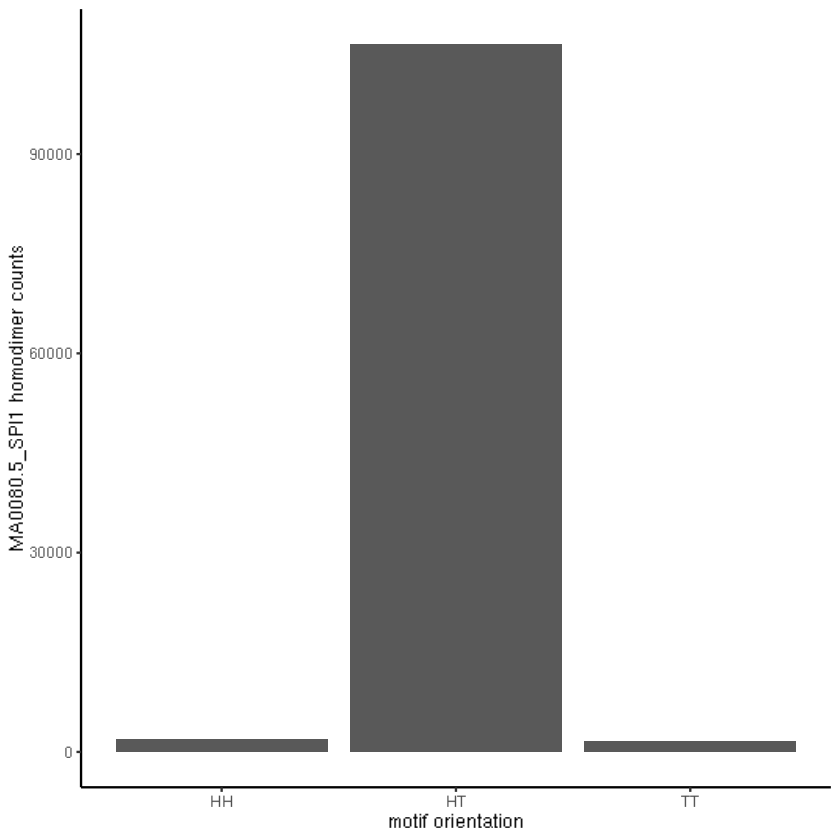

In [41]:
ggplot(mcols(matches), aes(x=mcols.orientation)) + geom_bar() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer counts")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_count_byorientation.pdf"), width=5, height=5)

### plot motif distance

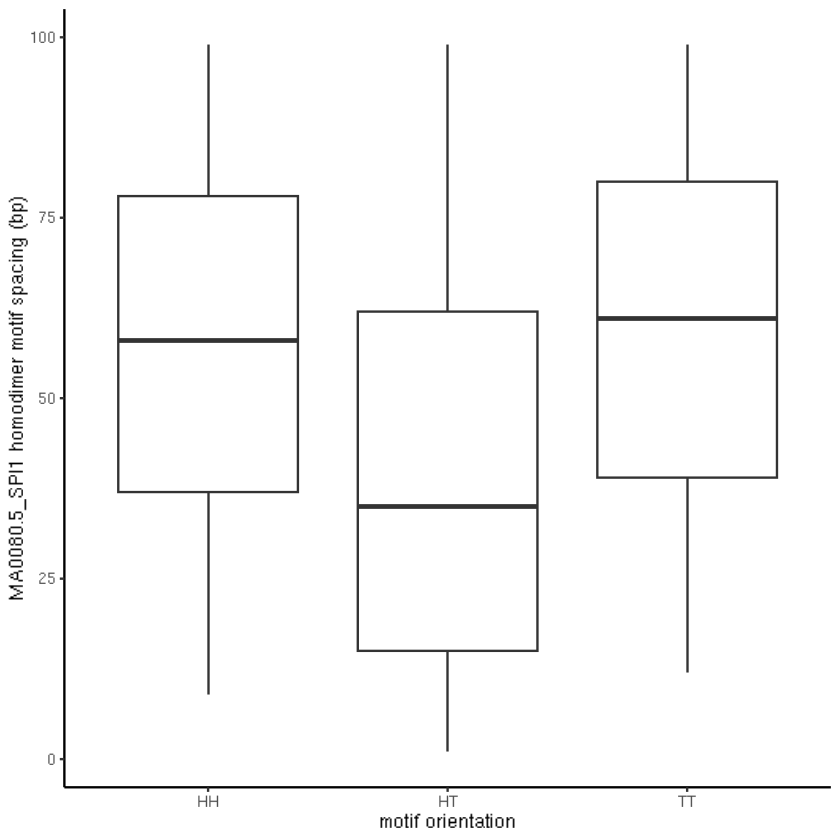

In [34]:
ggplot(mcols(matches), aes(x=mcols.orientation, y=motif_spacing)) + geom_boxplot() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer motif spacing (bp)")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_motif_spacing_byorientation.pdf"), width=5, height=5)

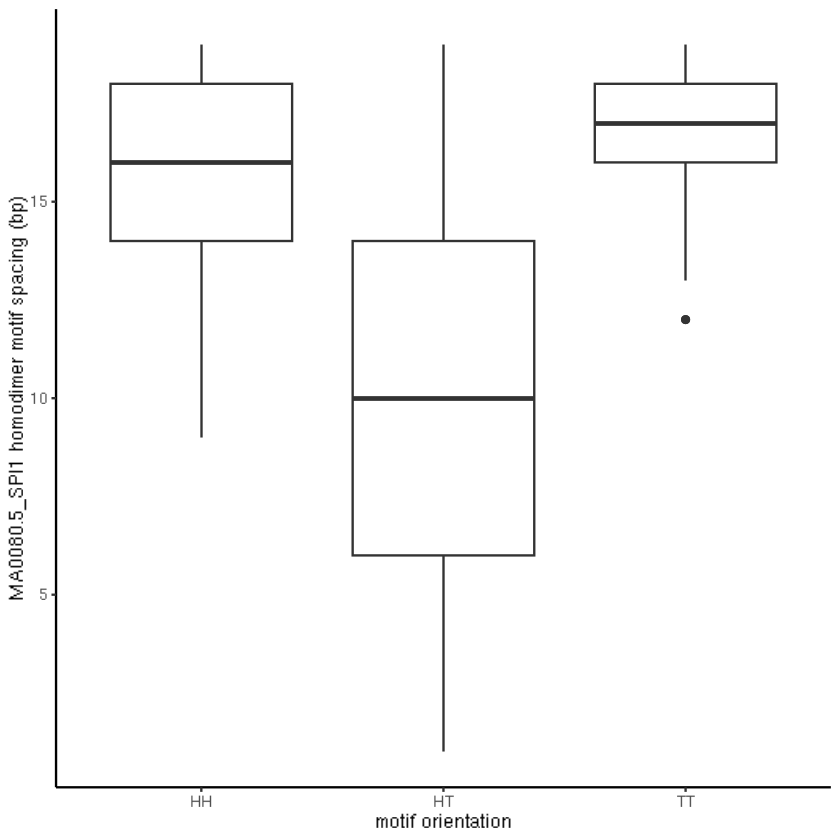

In [38]:
ggplot(mcols(matches) %>% as.data.frame %>% dplyr::filter(motif_spacing<20), aes(x=mcols.orientation, y=motif_spacing)) + geom_boxplot() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer motif spacing (bp)")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_motif_spacing<20_byorientation.pdf"), width=5, height=5)

### plot peak type

In [70]:
library(BSgenome.Hsapiens.UCSC.hg38)
library(ArchR)
addArchRGenome("hg38")
geneAnnot <- getArchRGenome(geneAnnotation = T, genomeAnnotation = F) %>% as.list
peaks_anno <- ArchR:::.fastAnnoPeaks(matches, BSgenome = BSgenome.Hsapiens.UCSC.hg38, geneAnnotation = geneAnnot)
saveRDS(peaks_anno, paste0(outdir, "/", TF, "_matches.rds"))

Setting default genome to Hg38.

Using GeneAnnotation set by addArchRGenome(Hg38)!

Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



In [6]:
peaks_anno <- readRDS(paste0(outdir, "/", TF, "_matches.rds"))

In [73]:
mcols(peaks_anno) %>% colnames

[1] "mcols.orientation" "mcols.start_a"     "mcols.start_b"    
 [4] "mcols.end_a"       "mcols.end_b"       "mcols.strand_a"   
 [7] "mcols.strand_b"    "mcols.score_a"     "mcols.score_b"    
[10] "motif_spacing"     "distToGeneStart"   "nearestGene"      
[13] "peakType"          "distToTSS"         "nearestTSS"       
[16] "GC"                "N"

In [100]:
peaks_anno

GRanges object with 109900 ranges and 17 metadata columns:
           seqnames              ranges strand | mcols.orientation
              <Rle>           <IRanges>  <Rle> |       <character>
       [1]     chrX 155626182-155626229      * |                HT
       [2]     chrX 155229654-155229679      * |                HT
       [3]     chrX 155229648-155229679      * |                HT
       [4]     chrX 155229648-155229673      * |                HT
       [5]     chrX 155106240-155106295      * |                HT
       ...      ...                 ...    ... .               ...
  [109896]     chr1       888473-888561      * |                HT
  [109897]     chr1       888473-888550      * |                HT
  [109898]     chr1       888473-888540      * |                HT
  [109899]     chr1       888429-888540      * |                HT
  [109900]     chr1       888429-888492      * |                HT
           mcols.start_a mcols.start_b mcols.end_a mcols.end_b mcols.s

`summarise()` has grouped output by 'mcols.orientation'. You can override using
the `.groups` argument.


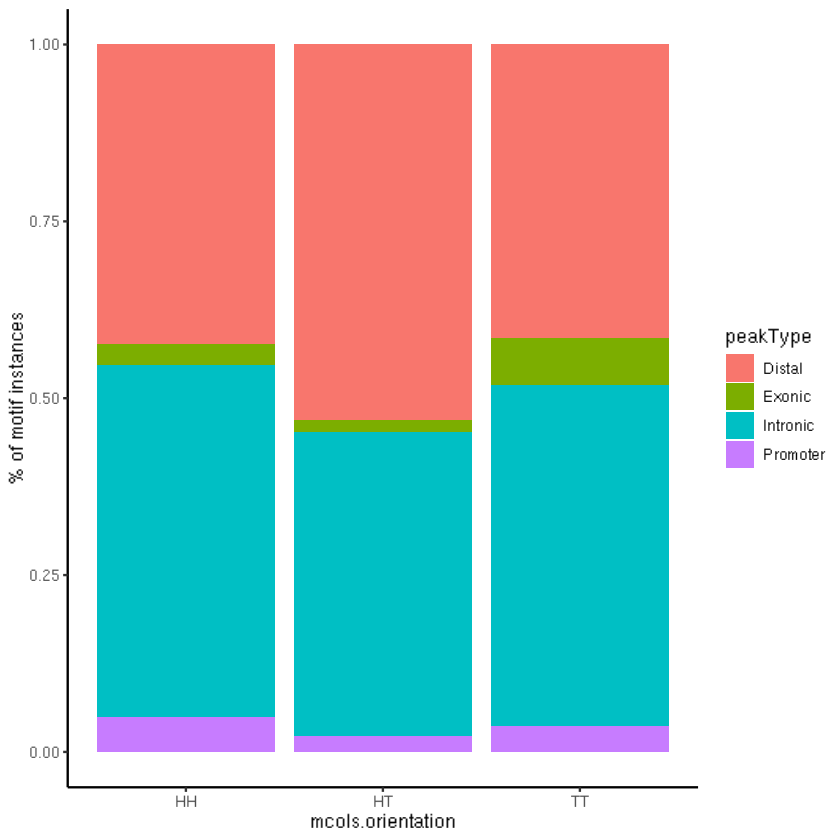

In [90]:
df <- mcols(peaks_anno) %>% as.data.frame %>% dplyr::group_by(mcols.orientation, peakType) %>% dplyr::summarise(count=n())

ggplot(df, aes(x=mcols.orientation, y=count, fill=peakType)) + geom_col(position="fill") + theme_classic() + ylab("% of motif instances")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_peaktype_byorientation.pdf"), width=5, height=5)

### how many homodimer instances exist per peak?

In [ ]:
# read the consensus peak set to get the peak ranges
conspeaks <- read.table(paste0(base_dir, "/output/02-atac/01/consensus_peaks_HEK293T.bed"), sep="\t", 
                        col.names=c("seqname", "start", "end", "name", "score", "strand"))
conspeaks <- makeGRangesFromDataFrame(conspeaks, keep.extra.columns=T)
conspeaks

GRanges object with 608176 ranges and 2 metadata columns:
           seqnames              ranges strand |                   name
              <Rle>           <IRanges>  <Rle> |            <character>
       [1]     chr1          9954-10456      * | HEK293T_P3A12_GFP_d1..
       [2]     chr1       778479-778981      * | HEK293T_P3A12_GFP_d1..
       [3]     chr1       778996-779498      * | HEK293T_P3G8_SPI1_d0..
       [4]     chr1       779566-780068      * | HEK293T_P1B6_SP4_d00..
       [5]     chr1       826547-827049      * | HEK293T_P3G7_SPI1_d1..
       ...      ...                 ...    ... .                    ...
  [608172]     chrX 155644324-155644826      * | HEK293T_P3C3_KLF4_d0..
  [608173]     chrX 155656934-155657436      * | HEK293T_P3E2_KLF1_d1..
  [608174]     chrX 155657577-155658079      * | HEK293T_P3C3_KLF4_d0..
  [608175]     chrX 155662296-155662798      * | HEK293T_P3A12_GFP_d1..
  [608176]     chrX 155687335-155687837      * | HEK293T_P2D8_ALX4_d0..
      

In [8]:
tmp <- findOverlaps(conspeaks, peaks_anno)
print(length(tmp))
print(length(tmp@to %>% unique))
print(length(tmp@from %>% unique))

[1] 110323
[1] 109900
[1] 22071


In [9]:
top_instance_conspeaks <- table(tmp@from) %>% sort %>% rev
top_instance_conspeaks


240931 287575 166255 183065 244434 164155 155695 447871 272880 518075  34971 
   459    420    358    354    280    280    261    235    218    216    211 
517349 589427 564741 367173 195030 558908 606398 488517 138797 142661 144341 
   210    189    178    178    178    175    170    170    168    166    165 
100142   7080  37898 447867 382185 498706 421569 376636  33583 303240 158910 
   165    163    162    161    160    157    157    156    154    153    151 
284768 106910 333028  31689 517112 317928  13435 565369 494117 593427 357524 
   149    148    147    147    144    143    141    138    136    132    130 
288786 384326 250204 240903 604807 387404 302647 205342 386085 513624 404194 
   130    129    129    126    124    124    124    122    120    117    117 
412952 333769 195031 514050 171329 585678 553409 325750 100815 440392  53889 
   116    116    116    115    115    114    114    114    114    113    113 
549863 225511 424502 307319 297517 247708 234940 524393 446537 

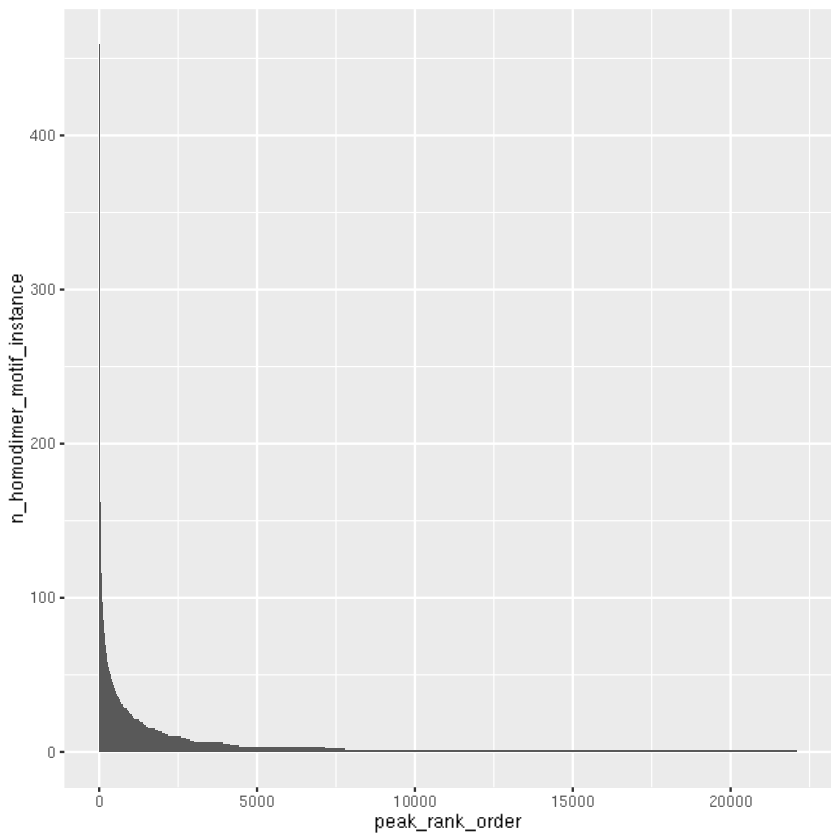

In [11]:
toplot <- top_instance_conspeaks %>% as.data.frame %>% dplyr::rename(peak_id="Var1", n_homodimer_motif_instance="Freq") %>% 
            dplyr::mutate(peak_rank_order=1:length(top_instance_conspeaks))
ggplot(data=toplot, aes(x=peak_rank_order, y=n_homodimer_motif_instance)) + geom_col()

In [9]:
top_instance_conspeaks %>% quantile

  0%  25%  50%  75% 100% 
   1    1    1    3  459 

In [169]:
conspeaks[names(head(top_instance_conspeaks, n=1000)) %>% as.integer,]

GRanges object with 1000 ranges and 2 metadata columns:
         seqnames              ranges strand |                   name     score
            <Rle>           <IRanges>  <Rle> |            <character> <numeric>
     [1]     chr6   24029225-24029727      * | HEK293T_P3F10_SPI1_d..   5.63883
     [2]     chr7     1188787-1189289      * | HEK293T_P1D3_ELF1_d0..   7.68141
     [3]     chr4   88912957-88913459      * | HEK293T_P3F10_SPI1_d..   5.63883
     [4]     chr4 150805173-150805675      * | HEK293T_P3H7_SPI1_d1..  27.84932
     [5]     chr6   34973898-34974400      * | HEK293T_P3F10_SPI1_d..   5.63883
     ...      ...                 ...    ... .                    ...       ...
   [996]     chr8     4510489-4510991      * | HEK293T_P3F10_SPI1_d..   7.39613
   [997]     chr7 146894996-146895498      * | HEK293T_P3F8_SPI1_d0..  22.95323
   [998]     chr7 127473158-127473660      * | HEK293T_P3F8_SPI1_d0..  14.64754
   [999]     chr7   98863707-98864209      * | HEK293T_P3G7_SPI1

In [174]:
conspeaks[608129]

GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |                   name     score
         <Rle>           <IRanges>  <Rle> |            <character> <numeric>
  [1]     chrX 155229590-155230092      * | HEK293T_P3E7_SPI1_d1..   10.8468
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

After checking a few of the top peaks with a lot of homodimer motif instances, these tend to be GA rich or TC rich repeat regions and may be biasing the distribution we were seeing earlier. Repeat plotting with a filtered list of motif instances after removing those occuring in repeat regions.

In [10]:
# get filtered list of motif instances and replot the distributions above
peaks_anno_norepeats <- peaks_anno[tmp[tmp@from %in% as.integer(top_instance_conspeaks[top_instance_conspeaks<4] %>% names)]@to %>% unique]
peaks_anno_norepeats

GRanges object with 23704 ranges and 17 metadata columns:
          seqnames              ranges strand | mcols.orientation mcols.start_a
             <Rle>           <IRanges>  <Rle> |       <character>     <integer>
      [1]     chr1       906875-906962      * |                HT        906875
      [2]     chr1     1035957-1035984      * |                HT       1035957
      [3]     chr1     1573995-1574051      * |                HT       1573995
      [4]     chr1     1883287-1883340      * |                HT       1883287
      [5]     chr1     1883287-1883308      * |                HT       1883287
      ...      ...                 ...    ... .               ...           ...
  [23700]     chrX 155106240-155106295      * |                HT     155106240
  [23701]     chrX 155229648-155229679      * |                HT     155229648
  [23702]     chrX 155229648-155229673      * |                HT     155229648
  [23703]     chrX 155229654-155229679      * |               

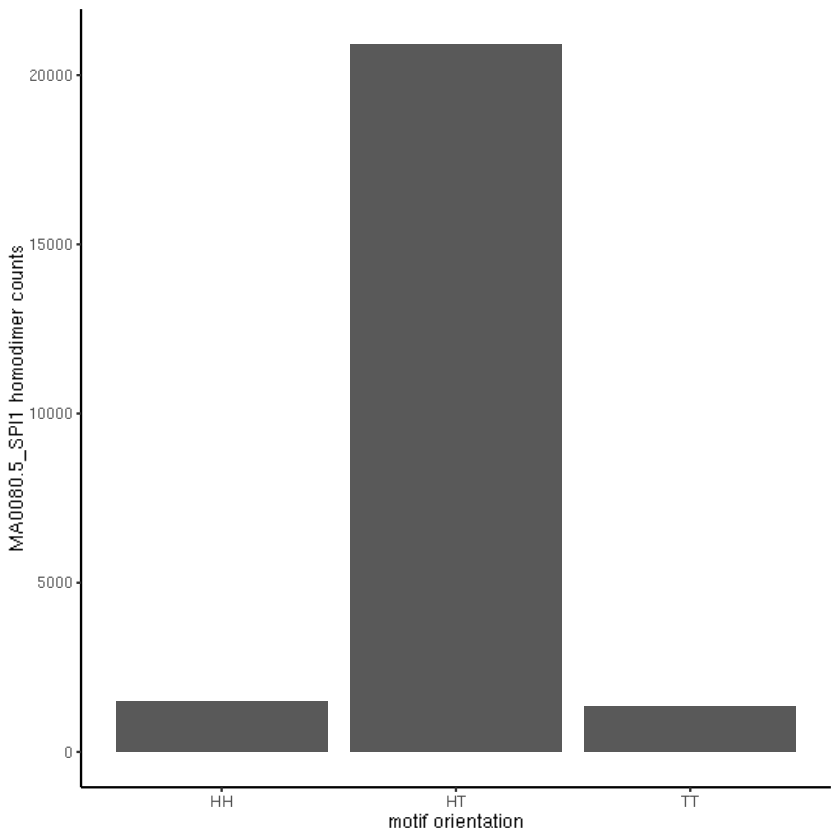

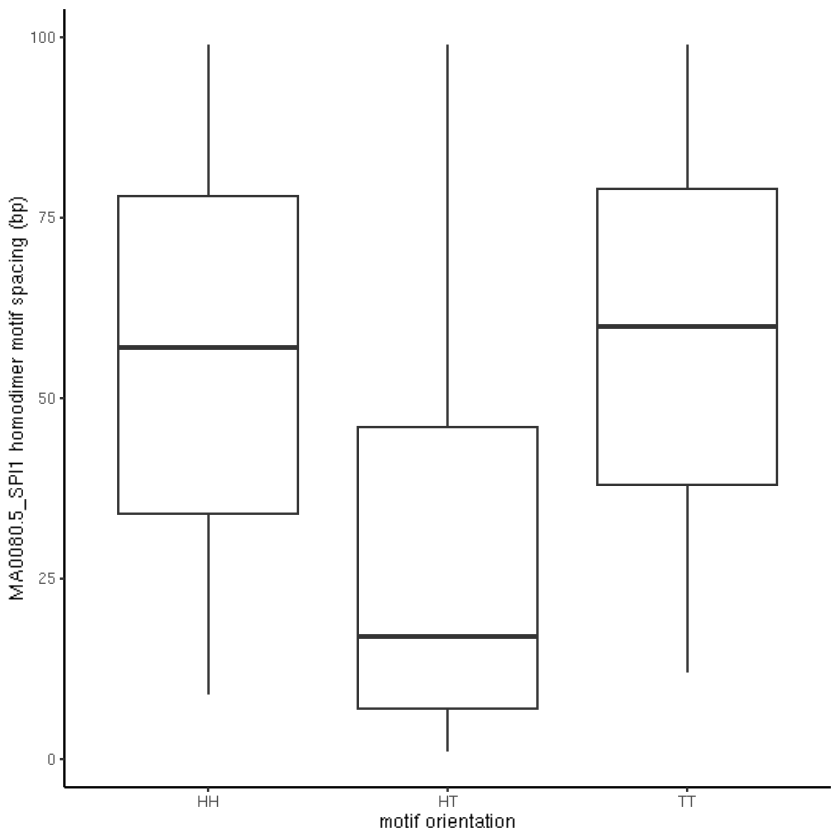

`summarise()` has grouped output by 'mcols.orientation'. You can override using
the `.groups` argument.


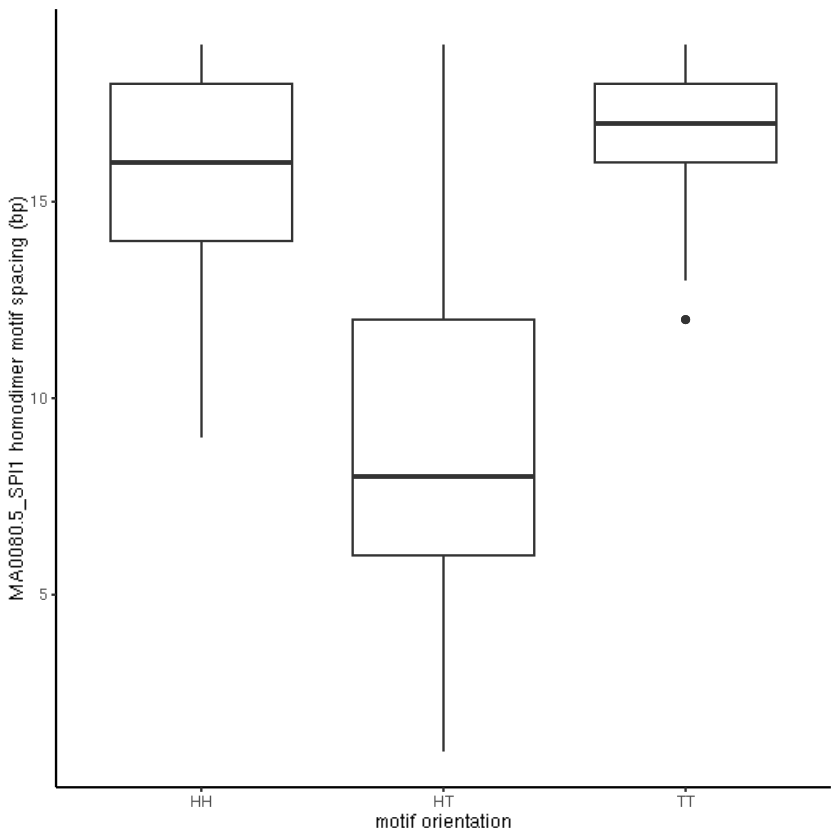

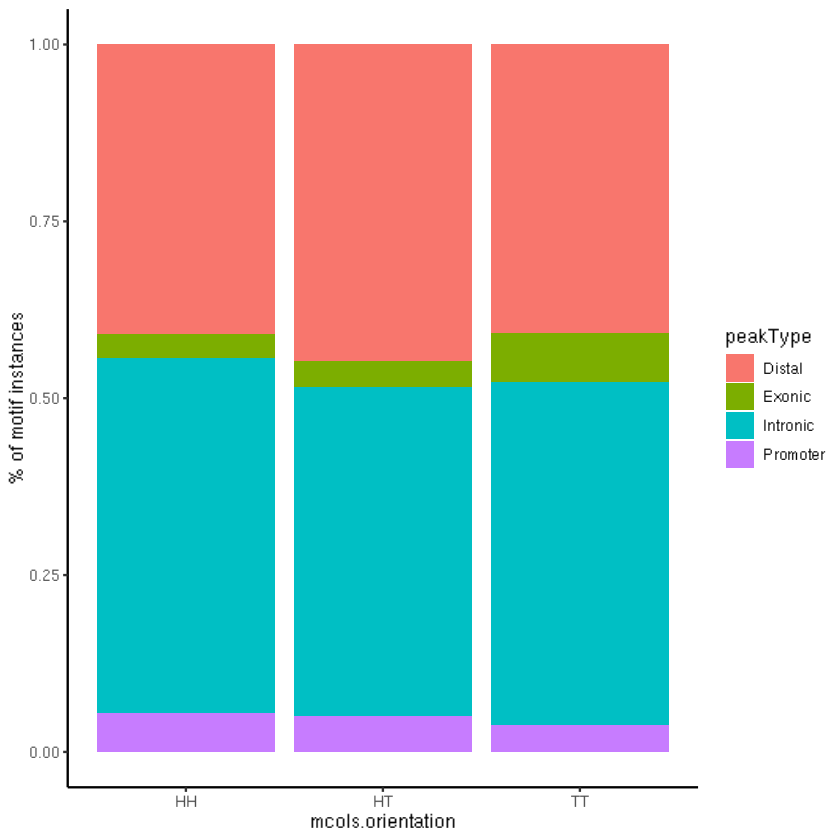

In [182]:
ggplot(mcols(peaks_anno_norepeats), aes(x=mcols.orientation)) + geom_bar() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer counts")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_count_byorientation_norepeatregion.pdf"), width=5, height=5)

ggplot(mcols(peaks_anno_norepeats), aes(x=mcols.orientation, y=motif_spacing)) + geom_boxplot() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer motif spacing (bp)")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_motif_spacing_byorientation_norepeatregion.pdf"), width=5, height=5)

ggplot(mcols(peaks_anno_norepeats) %>% as.data.frame %>% dplyr::filter(motif_spacing<20), aes(x=mcols.orientation, y=motif_spacing)) + geom_boxplot() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer motif spacing (bp)")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_motif_spacing<20_byorientation_norepeatregion.pdf"), width=5, height=5)

df <- mcols(peaks_anno_norepeats) %>% as.data.frame %>% dplyr::group_by(mcols.orientation, peakType) %>% dplyr::summarise(count=n())
ggplot(df, aes(x=mcols.orientation, y=count, fill=peakType)) + geom_col(position="fill") + theme_classic() + ylab("% of motif instances")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_peaktype_byorientation_norepeatregion.pdf"), width=5, height=5)

### plot avg accessibility at these sites

In [ ]:
cpm <- read.table(paste0(base_dir, "/output/02-atac/01/cpm.tsv"))
head(cpm)

X1_HEK293T_P1A2_SP4_d100
HEK293T_P3A12_GFP_d100_peak_1   1.588078                
HEK293T_P3A12_GFP_d100_peak_17  6.087634                
HEK293T_P3G8_SPI1_d075_peak_6   1.588078                
HEK293T_P1B6_SP4_d005_peak_3    1.323399                
HEK293T_P3G7_SPI1_d100_peak_10  2.382118                
HEK293T_P3F10_SPI1_d025_peak_18 2.117438                
                                X2_HEK293T_P1B2_SP4_d100
HEK293T_P3A12_GFP_d100_peak_1   0.8776116               
HEK293T_P3A12_GFP_d100_peak_17  8.9955187               
HEK293T_P3G8_SPI1_d075_peak_6   3.0716405               
HEK293T_P1B6_SP4_d005_peak_3    1.7552232               
HEK293T_P3G7_SPI1_d100_peak_10  0.8776116               
HEK293T_P3F10_SPI1_d025_peak_18 1.7552232               
                                X3_HEK293T_P1C2_ELF1_d100
HEK293T_P3A12_GFP_d100_peak_1   0.8770458                
HEK293T_P3A12_GFP_d100_peak_17  8.9897199                
HEK293T_P3G8_SPI1_d075_peak_6   1.0963073                
HEK293T_P1B6_SP4_d005_peak_3    2.4118761                
HEK293T_P3G7_SPI1_d100_peak_10  2.8503990                
HEK293T_P3F10_SPI1_d025_peak_18 3.2889219                
                                X4_HEK293T_P1D2_ELF1_d100
HEK293T_P3A12_GFP_d100_peak_1   1.688634                 
HEK293T_P3A12_GFP_d100_peak_17  9.118624                 
HEK293T_P3G8_SPI1_d075_peak_6   1.688634                 
HEK293T_P1B6_SP4_d005_peak_3    3.714995                 
HEK293T_P3G7_SPI1_d100_peak_10  1.350907                 
HEK293T_P3F10_SPI1_d025_peak_18 3.039541                 
                                X5_HEK293T_P1E2_FOXP1_d100
HEK293T_P3A12_GFP_d100_peak_1   2.175640                  
HEK293T_P3A12_GFP_d100_peak_17  8.857964                  
HEK293T_P3G8_SPI1_d075_peak_6   2.175640                  
HEK293T_P1B6_SP4_d005_peak_3    3.263461                  
HEK293T_P3G7_SPI1_d100_peak_10  2.020237                  
HEK293T_P3F10_SPI1_d025_peak_18 2.952655                  
                                X6_HEK293T_P1F2_FOXP1_d100
HEK293T_P3A12_GFP_d100_peak_1    1.393018                 
HEK293T_P3A12_GFP_d100_peak_17  10.795892                 
HEK293T_P3G8_SPI1_d075_peak_6    2.263655                 
HEK293T_P1B6_SP4_d005_peak_3     3.134291                 
HEK293T_P3G7_SPI1_d100_peak_10   1.393018                 
HEK293T_P3F10_SPI1_d025_peak_18  3.482546                 
                                X7_HEK293T_P1G2_GATA1_d100
HEK293T_P3A12_GFP_d100_peak_1   1.558472                  
HEK293T_P3A12_GFP_d100_peak_17  8.500757                  
HEK293T_P3G8_SPI1_d075_peak_6   0.991755                  
HEK293T_P1B6_SP4_d005_peak_3    3.116944                  
HEK293T_P3G7_SPI1_d100_peak_10  1.416793                  
HEK293T_P3F10_SPI1_d025_peak_18 3.967020                  
                                X8_HEK293T_P1H2_GATA1_d100
HEK293T_P3A12_GFP_d100_peak_1   1.6576188                 
HEK293T_P3A12_GFP_d100_peak_17  8.6564539                 
HEK293T_P3G8_SPI1_d075_peak_6   2.0259786                 
HEK293T_P1B6_SP4_d005_peak_3    2.2101584                 
HEK293T_P3G7_SPI1_d100_peak_10  0.3683597                 
HEK293T_P3F10_SPI1_d025_peak_18 4.2361370                 
                                X9_HEK293T_P1A3_SP4_d075
HEK293T_P3A12_GFP_d100_peak_1   1.483490                
HEK293T_P3A12_GFP_d100_peak_17  8.900937                
HEK293T_P3G8_SPI1_d075_peak_6   1.483490                
HEK293T_P1B6_SP4_d005_peak_3    2.472483                
HEK293T_P3G7_SPI1_d100_peak_10  0.988993                
HEK293T_P3F10_SPI1_d025_peak_18 3.461476                
                                X10_HEK293T_P1B3_SP4_d075 ⋯
HEK293T_P3A12_GFP_d100_peak_1   0.425564                  ⋯
HEK293T_P3A12_GFP_d100_peak_17  5.957896                  ⋯
HEK293T_P3G8_SPI1_d075_peak_6   1.276692                  ⋯
HEK293T_P1B6_SP4_d005_peak_3    1.276692                  ⋯
HEK293T_P3G7_SPI1_d100_peak_10  1.702256                  ⋯
HEK293T_P3F

In [12]:
# get overlap between consensus peaks and the homodimer motifs
# filter consensus peaks to just the ones overlapping homodimer motif instances to reduce search space for the next step
overlap <- findOverlaps(conspeaks, peaks_anno_norepeats)
sub_conspeaks <- conspeaks[overlap@from %>% unique]
sub_conspeaks

GRanges object with 17683 ranges and 2 metadata columns:
          seqnames              ranges strand |                   name
             <Rle>           <IRanges>  <Rle> |            <character>
      [1]     chr1       906537-907039      * | HEK293T_P2E8_TCF3_d0..
      [2]     chr1     1035871-1036373      * | HEK293T_P3F2_KLF1_d1..
      [3]     chr1     1573737-1574239      * | HEK293T_P3C8_MYC_d07..
      [4]     chr1     1882953-1883455      * | HEK293T_P1D7_FOXO1_d..
      [5]     chr1     2049033-2049535      * | HEK293T_P3H2_KLF1_d1..
      ...      ...                 ...    ... .                    ...
  [17679]     chrX 154800528-154801030      * | HEK293T_P3F10_SPI1_d..
  [17680]     chrX 155072898-155073400      * | HEK293T_P3G3_KLF1_d0..
  [17681]     chrX 155105903-155106405      * | HEK293T_P3B7_SOX2_d1..
  [17682]     chrX 155229590-155230092      * | HEK293T_P3E7_SPI1_d1..
  [17683]     chrX 155625787-155626289      * | HEK293T_P2D9_ALX4_d0..
              score


In [13]:
# filter cpm to just columns with TF of interest
subcpm <- cpm[,grep(TF, colnames(cpm), value=T)]
head(subcpm)

X373_HEK293T_P3E7_SPI1_d100
HEK293T_P3A12_GFP_d100_peak_1   2.384648                   
HEK293T_P3A12_GFP_d100_peak_17  9.538592                   
HEK293T_P3G8_SPI1_d075_peak_6   1.490405                   
HEK293T_P1B6_SP4_d005_peak_3    0.894243                   
HEK293T_P3G7_SPI1_d100_peak_10  4.471215                   
HEK293T_P3F10_SPI1_d025_peak_18 3.278891                   
                                X374_HEK293T_P3F7_SPI1_d100
HEK293T_P3A12_GFP_d100_peak_1    1.775720                  
HEK293T_P3A12_GFP_d100_peak_17  11.009465                  
HEK293T_P3G8_SPI1_d075_peak_6    0.355144                  
HEK293T_P1B6_SP4_d005_peak_3     1.420576                  
HEK293T_P3G7_SPI1_d100_peak_10   5.327160                  
HEK293T_P3F10_SPI1_d025_peak_18  3.551440                  
                                X375_HEK293T_P3G7_SPI1_d100
HEK293T_P3A12_GFP_d100_peak_1   2.013739                   
HEK293T_P3A12_GFP_d100_peak_17  8.917989                   
HEK293T_P3G8_SPI1_d075_peak_6   2.876771                   
HEK293T_P1B6_SP4_d005_peak_3    2.013739                   
HEK293T_P3G7_SPI1_d100_peak_10  5.178187                   
HEK293T_P3F10_SPI1_d025_peak_18 2.301417                   
                                X376_HEK293T_P3H7_SPI1_d100
HEK293T_P3A12_GFP_d100_peak_1   0.6847034                  
HEK293T_P3A12_GFP_d100_peak_17  8.4446756                  
HEK293T_P3G8_SPI1_d075_peak_6   1.8258758                  
HEK293T_P1B6_SP4_d005_peak_3    1.3694069                  
HEK293T_P3G7_SPI1_d100_peak_10  5.0211585                  
HEK293T_P3F10_SPI1_d025_peak_18 4.1082206                  
                                X381_HEK293T_P3E8_SPI1_d075
HEK293T_P3A12_GFP_d100_peak_1   2.257505                   
HEK293T_P3A12_GFP_d100_peak_17  7.901266                   
HEK293T_P3G8_SPI1_d075_peak_6   1.881254                   
HEK293T_P1B6_SP4_d005_peak_3    1.128752                   
HEK293T_P3G7_SPI1_d100_peak_10  6.020012                   
HEK293T_P3F10_SPI1_d025_peak_18 2.257505                   
                                X382_HEK293T_P3F8_SPI1_d075
HEK293T_P3A12_GFP_d100_peak_1   2.760732                   
HEK293T_P3A12_GFP_d100_peak_17  8.282197                   
HEK293T_P3G8_SPI1_d075_peak_6   3.105824                   
HEK293T_P1B6_SP4_d005_peak_3    2.415641                   
HEK293T_P3G7_SPI1_d100_peak_10  3.796007                   
HEK293T_P3F10_SPI1_d025_peak_18 3.450915                   
                                X383_HEK293T_P3G8_SPI1_d075
HEK293T_P3A12_GFP_d100_peak_1   2.9444773                  
HEK293T_P3A12_GFP_d100_peak_17  9.6747110                  
HEK293T_P3G8_SPI1_d075_peak_6   3.3651169                  
HEK293T_P1B6_SP4_d005_peak_3    0.8412792                  
HEK293T_P3G7_SPI1_d100_peak_10  5.0476753                  
HEK293T_P3F10_SPI1_d025_peak_18 3.7857565                  
                                X384_HEK293T_P3H8_SPI1_d075
HEK293T_P3A12_GFP_d100_peak_1   1.3828691                  
HEK293T_P3A12_GFP_d100_peak_17  9.3343663                  
HEK293T_P3G8_SPI1_d075_peak_6   2.7657382                  
HEK293T_P1B6_SP4_d005_peak_3    0.3457173                  
HEK293T_P3G7_SPI1_d100_peak_10  4.1486073                  
HEK293T_P3F10_SPI1_d025_peak_18 3.8028900                  
                                X389_HEK293T_P3E9_SPI1_d050
HEK293T_P3A12_GFP_d100_peak_1   2.609116                   
HEK293T_P3A12_GFP_d100_peak_17  7.305524                   
HEK293T_P3G8_SPI1_d075_peak_6   1.043646                   
HEK293T_P1B6_SP4_d005_peak_3    1.565469                   
HEK293T_P3G7_SPI1_d100_peak_10  3.652762                   
HEK293T_P3F10_SPI1_d025_peak_18 3.652762                   
                                X390_HEK293T_P3F9_SPI1_d050
HEK293T_P3A12_GFP_d100_peak_1   2.414759                   
HEK293T_P3A12_GFP_d100_peak_17  9.659036                   
HEK293T_P3G8_SPI1_d075_peak_6   2.012299                   
HEK293T_P1B6

In [14]:
# takes 1hr
dose_ls <- c("d100", "d075", "d050", "d025", "d005")
output <- list()

for (i in 1:length(peaks_anno_norepeats)){
    currins <- peaks_anno_norepeats[i]

    overlap <- findOverlaps(currins, sub_conspeaks)
    if (length(overlap@to)>0){ 
        avg <- lapply(dose_ls, function(d){
            df <- subcpm[sub_conspeaks[overlap@to]$name, grep(d, colnames(subcpm), value=T)]
            return(c(d, mean(df %>% unname %>% unlist %>% na.omit)))
        })
        avg <- do.call(rbind, avg) %>% as.data.frame %>% dplyr::rename(dose="V1", avg_cpm="V2")
        avg <- cbind(avg, i, mcols(peaks_anno_norepeats[i]))
        output[[i]] <- avg
    }
}

output <- do.call(rbind, output)
head(output, n=10)
saveRDS(output, paste0(outdir, "/", TF, "_cpm_peaks_anno_norepeat.rds"))

dose avg_cpm           i mcols.orientation mcols.start_a mcols.start_b
1  d100 2.65083686845633  1 HT                 906875        906943      
2  d075 2.44149611337545  1 HT                 906875        906943      
3  d050 2.65733296601594  1 HT                 906875        906943      
4  d025 3.7011631998772   1 HT                 906875        906943      
5  d005 4.64360781394504  1 HT                 906875        906943      
6  d100 0.569707630916729 2 HT                1035957       1035965      
7  d075 0.826194953911801 2 HT                1035957       1035965      
8  d050 0.580566011948301 2 HT                1035957       1035965      
9  d025 1.56693120189799  2 HT                1035957       1035965      
10 d005 0.56783964912974  2 HT                1035957       1035965      
   mcols.end_a mcols.end_b mcols.strand_a mcols.strand_b mcols.score_a
1   906894      906962     -              -              11.70304     
2   906894      906962     -              -              11.70304     
3   906894      906962     -              -              11.70304     
4   906894      906962     -              -              11.70304     
5   906894      906962     -              -              11.70304     
6  1035976     1035984     +              +              11.82164     
7  1035976     1035984     +              +              11.82164     
8  1035976     1035984     +              +              11.82164     
9  1035976     1035984     +              +              11.82164     
10 1035976     1035984     +              +              11.82164     
   mcols.score_b motif_spacing distToGeneStart nearestGene peakType distToTSS
1  11.70304      68            12773           LINC02593   Distal   2083     
2  11.70304      68            12773           LINC02593   Distal   2083     
3  11.70304      68            12773           LINC02593   Distal   2083     
4  11.70304      68            12773           LINC02593   Distal   2083     
5  11.70304      68            12773           LINC02593   Distal   2083     
6  16.90109       8            15846           AGRN        Intronic 1102     
7  16.90109       8            15846           AGRN        Intronic 1102     
8  16.90109       8            15846           AGRN        Intronic 1102     
9  16.90109       8            15846           AGRN        Intronic 1102     
10 16.90109       8            15846           AGRN        Intronic 1102     
   nearestTSS GC     N
1  uc057axn.1 0.5909 0
2  uc057axn.1 0.5909 0
3  uc057axn.1 0.5909 0
4  uc057axn.1 0.5909 0
5  uc057axn.1 0.5909 0
6  uc057ayv.1 0.5714 0
7  uc057ayv.1 0.5714 0
8  uc057ayv.1 0.5714 0
9  uc057ayv.1 0.5714 0
10 uc057ayv.1 0.5714 0

In [20]:
output$avg_cpm <- as.numeric(output$avg_cpm)
head(output)

dose avg_cpm   i mcols.orientation mcols.start_a mcols.start_b mcols.end_a
1 d100 2.6508369 1 HT                 906875        906943        906894    
2 d075 2.4414961 1 HT                 906875        906943        906894    
3 d050 2.6573330 1 HT                 906875        906943        906894    
4 d025 3.7011632 1 HT                 906875        906943        906894    
5 d005 4.6436078 1 HT                 906875        906943        906894    
6 d100 0.5697076 2 HT                1035957       1035965       1035976    
  mcols.end_b mcols.strand_a mcols.strand_b mcols.score_a mcols.score_b
1  906962     -              -              11.70304      11.70304     
2  906962     -              -              11.70304      11.70304     
3  906962     -              -              11.70304      11.70304     
4  906962     -              -              11.70304      11.70304     
5  906962     -              -              11.70304      11.70304     
6 1035984     +              +              11.82164      16.90109     
  motif_spacing distToGeneStart nearestGene peakType distToTSS nearestTSS
1 68            12773           LINC02593   Distal   2083      uc057axn.1
2 68            12773           LINC02593   Distal   2083      uc057axn.1
3 68            12773           LINC02593   Distal   2083      uc057axn.1
4 68            12773           LINC02593   Distal   2083      uc057axn.1
5 68            12773           LINC02593   Distal   2083      uc057axn.1
6  8            15846           AGRN        Intronic 1102      uc057ayv.1
  GC     N
1 0.5909 0
2 0.5909 0
3 0.5909 0
4 0.5909 0
5 0.5909 0
6 0.5714 0

Warning message:
“Removed 3679 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 7981 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


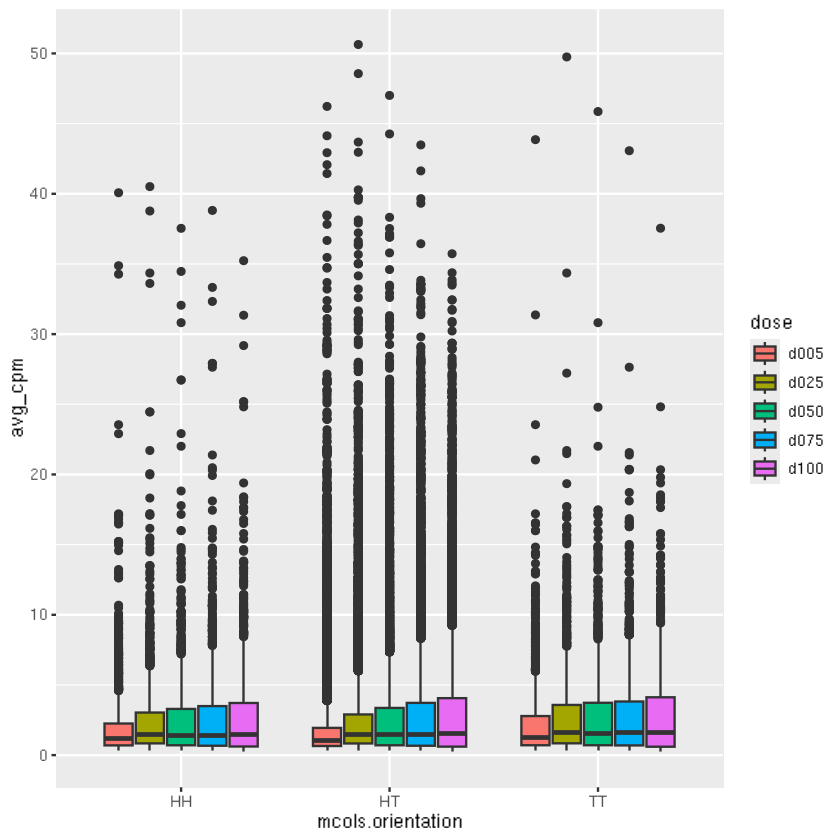

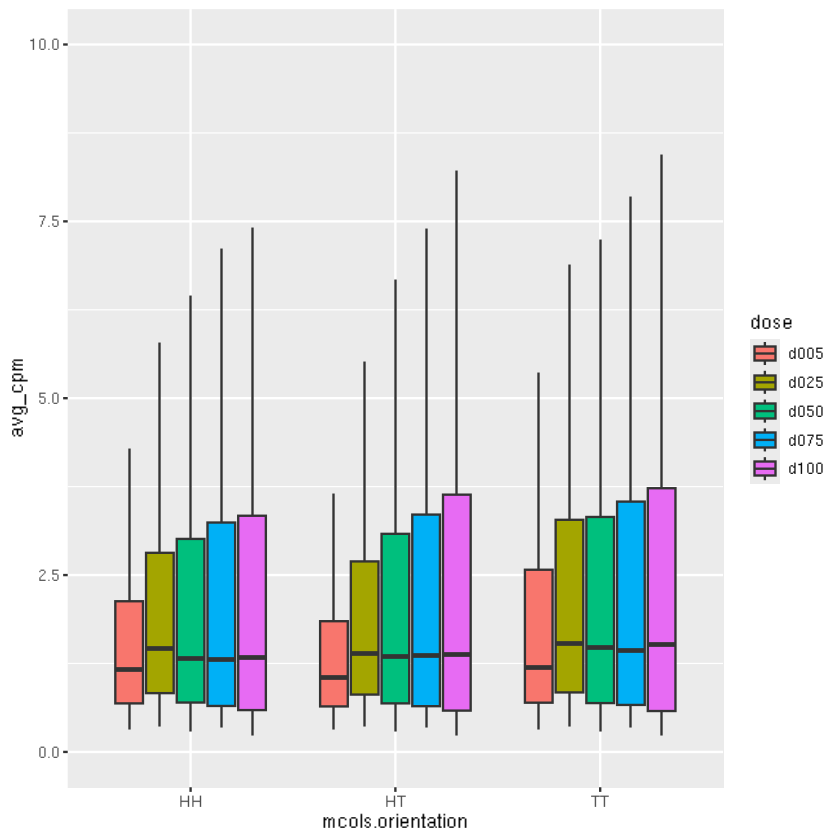

In [32]:
p1 <- ggplot(output, aes(x=mcols.orientation, y=avg_cpm, fill=dose)) + geom_boxplot()
p2 <- ggplot(output, aes(x=mcols.orientation, y=avg_cpm, fill=dose)) + geom_boxplot(outlier.shape=NA) + ylim(0, 10)
p1
p2

Warning message:
“Removed 3679 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 7981 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


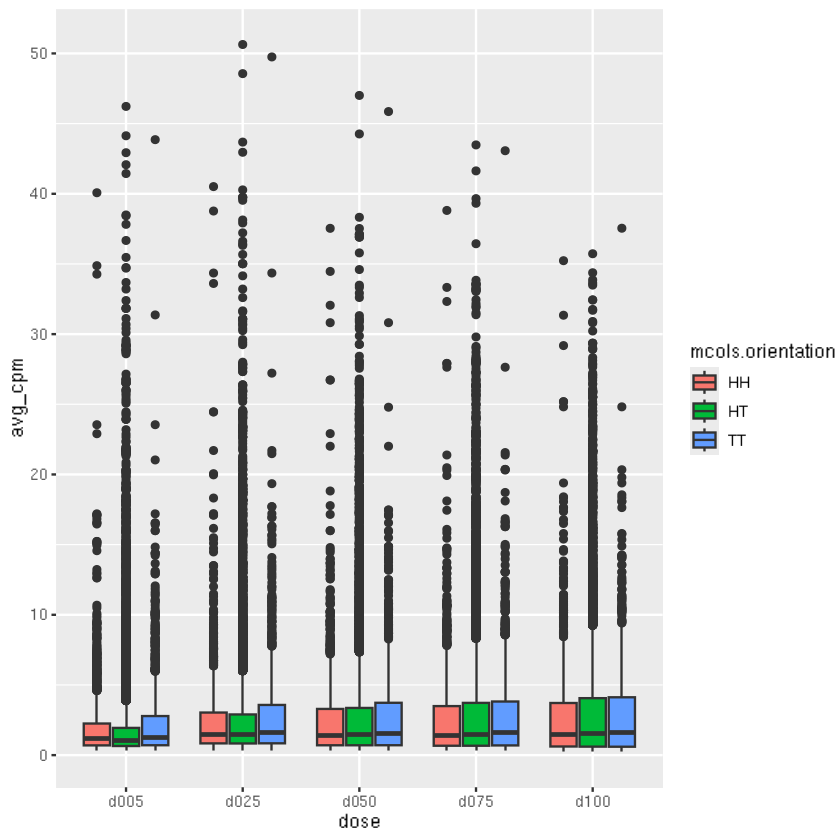

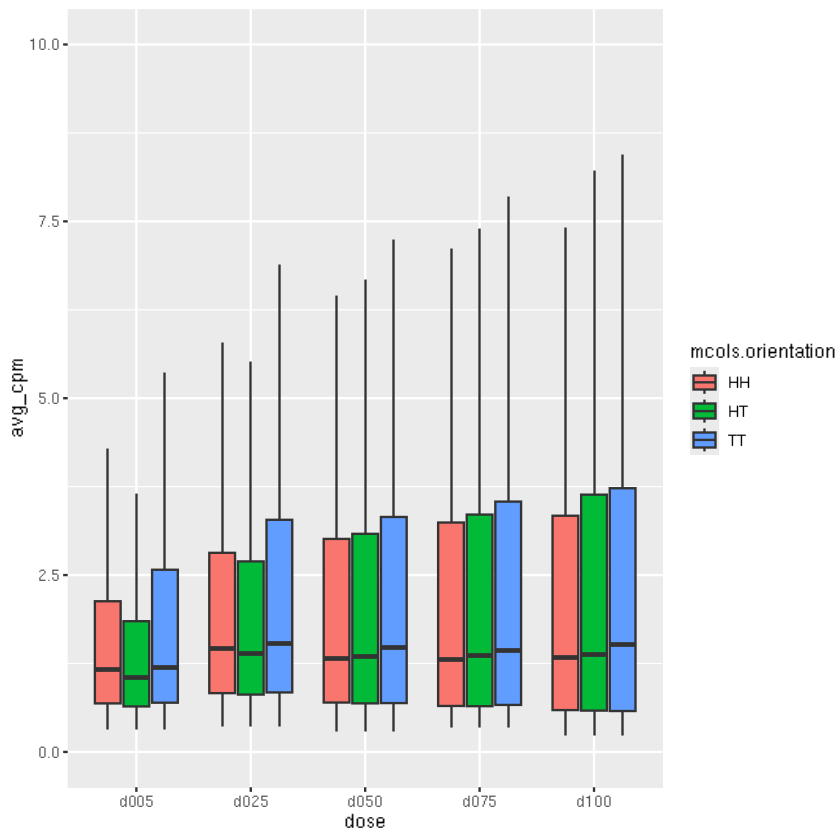

In [33]:
p3 <- ggplot(output, aes(fill=mcols.orientation, y=avg_cpm, x=dose)) + geom_boxplot()
p4 <- ggplot(output, aes(fill=mcols.orientation, y=avg_cpm, x=dose)) + geom_boxplot(outlier.shape=NA) + ylim(0, 10)
p3
p4

In [34]:
pdf(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_avgcpm_byorientation_bydose_norepeatregion.pdf"), width=5, height=5)
p1
p2
p3
p4
dev.off()

Warning message:
“Removed 3679 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 7981 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3679 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 7981 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


png 
  2

## Filter JASPAR matches with motif hits
only keep matches that overlap with a ChromBPNet ETS motif hit

In [35]:
submotifs <- motifs[motif_code_ls[TF]] %>% unlist
submotifs

GRanges object with 200923 ranges and 1 metadata column:
                seqnames              ranges strand |     score
                   <Rle>           <IRanges>  <Rle> | <numeric>
  MA0080.5_SPI1     chr1       838299-838318      + |   12.3623
  MA0080.5_SPI1     chr1       888320-888339      + |   11.9226
  MA0080.5_SPI1     chr1       888429-888448      + |   15.7388
  MA0080.5_SPI1     chr1       888473-888492      + |   12.1986
  MA0080.5_SPI1     chr1       888521-888540      + |   18.8957
            ...      ...                 ...    ... .       ...
  MA0080.5_SPI1     chrX 155624804-155624823      - |   14.2075
  MA0080.5_SPI1     chrX 155625881-155625900      - |   12.6087
  MA0080.5_SPI1     chrX 155626182-155626201      - |   11.7539
  MA0080.5_SPI1     chrX 155626210-155626229      - |   12.0999
  MA0080.5_SPI1     chrX 155638380-155638399      + |   15.5355
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [55]:
# filter 
t <- hits[grepl("ETS", names(hits))] %>% unlist
head(t)


GRanges object with 6 ranges and 3 metadata columns:
                          seqnames        ranges strand |
                             <Rle>     <IRanges>  <Rle> |
  pos_patterns.ETS_single     chr1 778914-778919      + |
  pos_patterns.ETS_single     chr1 779902-779907      - |
  pos_patterns.ETS_single     chr1 827335-827340      + |
  pos_patterns.ETS_single     chr1 827513-827518      + |
  pos_patterns.ETS_single     chr1 827764-827769      + |
  pos_patterns.ETS_single     chr1 876632-876637      + |
                                            name     score
                                     <character> <numeric>
  pos_patterns.ETS_single pos_patterns.ETS_sin..   694.038
  pos_patterns.ETS_single pos_patterns.ETS_sin..   856.465
  pos_patterns.ETS_single pos_patterns.ETS_sin..   801.621
  pos_patterns.ETS_single pos_patterns.ETS_sin..   870.609
  pos_patterns.ETS_single pos_patterns.ETS_sin..   928.607
  pos_patterns.ETS_single pos_patterns.ETS_sin..   787.055
           

In [57]:
overlap <- findOverlaps(submotifs, t)
submotifs <- submotifs[overlap@from %>% unique]

In [58]:
# this takes ~ 5 hrs
matches <- GRanges()
motif_length <- width(submotifs[1])
window <- 100 - motif_length

for (i in 1:length(submotifs)-1){
    a <- submotifs[i]
    searchspace <- submotifs[(i+1):length(submotifs)]
    overlaps <- findOverlaps(a + window, searchspace, ignore.strand=TRUE)
    if (length(overlaps)>0){
        nearby_motifs <- searchspace[overlaps@to]
        
        for (j in 1:length(nearby_motifs)){
            b <- nearby_motifs[j]
            if (as.character(strand(a)) == as.character(strand(b))){
                orientation = "HT"
            } else {
                strand_pair = ifelse(start(a) < start(b), paste0(strand(a), strand(b)), paste0(strand(b), strand(a)))
                orientation = ifelse(strand_pair=="+-", "HH", "TT")
            }
            tmp <- GRanges(paste0(seqnames(a), ":", min(start(a), start(b)), "-", max(end(a), end(b))), 
                                        mcols=DataFrame(orientation=orientation,
                                                        start_a = start(a), start_b = start(b),
                                                        end_a = end(a), end_b = end(b),
                                                        strand_a=strand(a), strand_b=strand(b),
                                                        score_a=a$score, score_b=b$score))
            tmp$motif_spacing <- width(tmp) - motif_length
            matches <- append(tmp,
                            matches)
        }

    }
}

saveRDS(matches, paste0(outdir, "/", TF, "_tmp_matches_filterbyhits.rds"))


Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objec

In [59]:
matches

GRanges object with 50729 ranges and 10 metadata columns:
          seqnames              ranges strand | mcols.orientation mcols.start_a
             <Rle>           <IRanges>  <Rle> |       <character>     <integer>
      [1]     chrX 155229654-155229679      * |                HT     155229654
      [2]     chrX 155229648-155229679      * |                HT     155229648
      [3]     chrX 155229648-155229673      * |                HT     155229648
      [4]     chrX 154776244-154776271      * |                HT     154776244
      [5]     chrX 154475849-154475874      * |                HT     154475849
      ...      ...                 ...    ... .               ...           ...
  [50725]     chr1       888521-888550      * |                HT        888521
  [50726]     chr1       888473-888588      * |                HT        888473
  [50727]     chr1       888473-888561      * |                HT        888473
  [50728]     chr1       888473-888550      * |               

In [60]:
matches$mcols.orientation %>% table

.
   HH    HT    TT 
  158 50438   133 

In [61]:
library(BSgenome.Hsapiens.UCSC.hg38)
library(ArchR)
addArchRGenome("hg38")
geneAnnot <- getArchRGenome(geneAnnotation = T, genomeAnnotation = F) %>% as.list
peaks_anno <- ArchR:::.fastAnnoPeaks(matches, BSgenome = BSgenome.Hsapiens.UCSC.hg38, geneAnnotation = geneAnnot)
saveRDS(peaks_anno, paste0(outdir, "/", TF, "_matches_filterbyhits.rds"))

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
 

In [ ]:
peaks_anno <- readRDS(paste0(outdir, "/", TF, "_matches_filterbyhits.rds"))

In [ ]:
# read the consensus peak set to get the peak ranges
conspeaks <- read.table(paste0(base_dir, "/output/02-atac/01/consensus_peaks_HEK293T.bed"), sep="\t", 
                        col.names=c("seqname", "start", "end", "name", "score", "strand"))
conspeaks <- makeGRangesFromDataFrame(conspeaks, keep.extra.columns=T)
conspeaks

GRanges object with 608176 ranges and 2 metadata columns:
           seqnames              ranges strand |                   name
              <Rle>           <IRanges>  <Rle> |            <character>
       [1]     chr1          9954-10456      * | HEK293T_P3A12_GFP_d1..
       [2]     chr1       778479-778981      * | HEK293T_P3A12_GFP_d1..
       [3]     chr1       778996-779498      * | HEK293T_P3G8_SPI1_d0..
       [4]     chr1       779566-780068      * | HEK293T_P1B6_SP4_d00..
       [5]     chr1       826547-827049      * | HEK293T_P3G7_SPI1_d1..
       ...      ...                 ...    ... .                    ...
  [608172]     chrX 155644324-155644826      * | HEK293T_P3C3_KLF4_d0..
  [608173]     chrX 155656934-155657436      * | HEK293T_P3E2_KLF1_d1..
  [608174]     chrX 155657577-155658079      * | HEK293T_P3C3_KLF4_d0..
  [608175]     chrX 155662296-155662798      * | HEK293T_P3A12_GFP_d1..
  [608176]     chrX 155687335-155687837      * | HEK293T_P2D8_ALX4_d0..
      

In [63]:
tmp <- findOverlaps(conspeaks, peaks_anno)
print(length(tmp))
print(length(tmp@to %>% unique))
print(length(tmp@from %>% unique))

top_instance_conspeaks <- table(tmp@from) %>% sort %>% rev
top_instance_conspeaks

top_instance_conspeaks %>% quantile

[1] 50877
[1] 50729
[1] 8449



287575 166255 155695 517349 240931 272880 447871 558908 100142 376636 244434 
   379    354    261    210    207    200    183    175    165    156    155 
 34971 565369  33583 382185 144341 317928 513624 250204 333028 589427 488517 
   145    138    135    131    130    128    116    116    114    113    113 
367173 514050 412952  53889 138797 494117 309438 234940 106910 297517  76813 
   111    102    101    101    100     98     97     97     97     93     93 
240903  13435 384326 335777 386085 604807 536016  53799 606398 398580  37898 
    91     91     90     90     88     87     87     87     85     85     85 
595555  68380   7080 171329 472152 334825 585678 435596 166776  57602 205342 
    82     82     82     81     80     80     78     78     76     74     73 
 71394 390399 192100 100815  20226 514198 601151 427409 225511 185609 240876 
    73     72     72     72     72     71     70     70     70     70     69 
564741 289132 183065 158910  36234 301926 177763 586224 562989 

  0%  25%  50%  75% 100% 
   1    1    1    6  379 

GRanges object with 9749 ranges and 17 metadata columns:
         seqnames              ranges strand | mcols.orientation mcols.start_a
            <Rle>           <IRanges>  <Rle> |       <character>     <integer>
     [1]     chr1     1035957-1035984      * |                HT       1035957
     [2]     chr1     1948896-1948952      * |                HT       1948896
     [3]     chr1     1948896-1948937      * |                HT       1948896
     [4]     chr1     1948918-1949021      * |                HT       1948918
     [5]     chr1     1948918-1948952      * |                HT       1948918
     ...      ...                 ...    ... .               ...           ...
  [9745]     chrX 154475849-154475874      * |                HT     154475849
  [9746]     chrX 154776244-154776271      * |                HT     154776244
  [9747]     chrX 155229648-155229679      * |                HT     155229648
  [9748]     chrX 155229648-155229673      * |                HT     15522

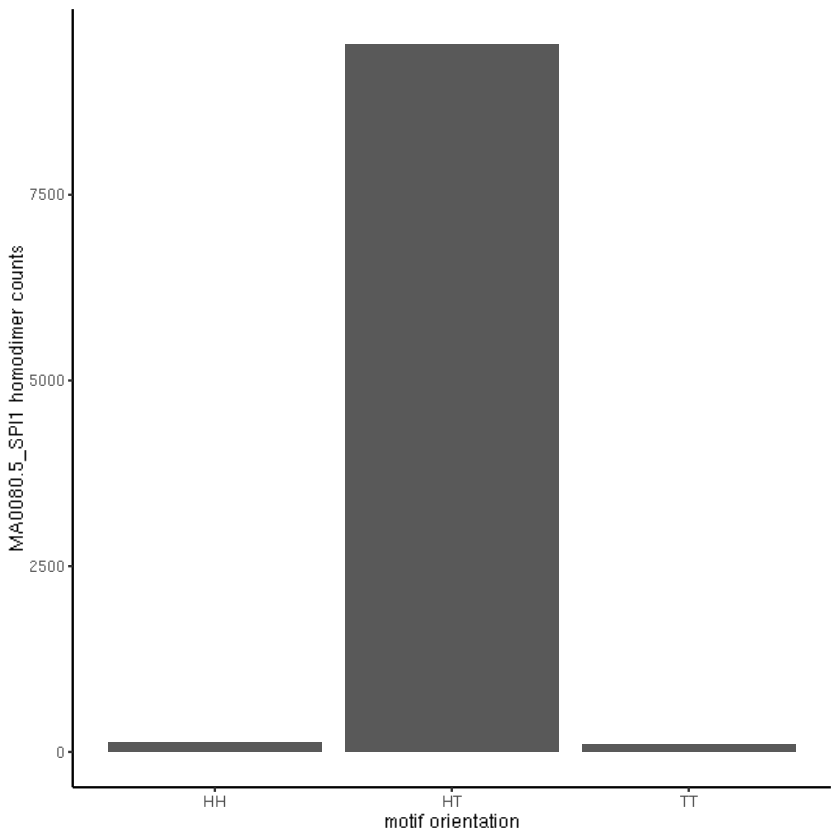

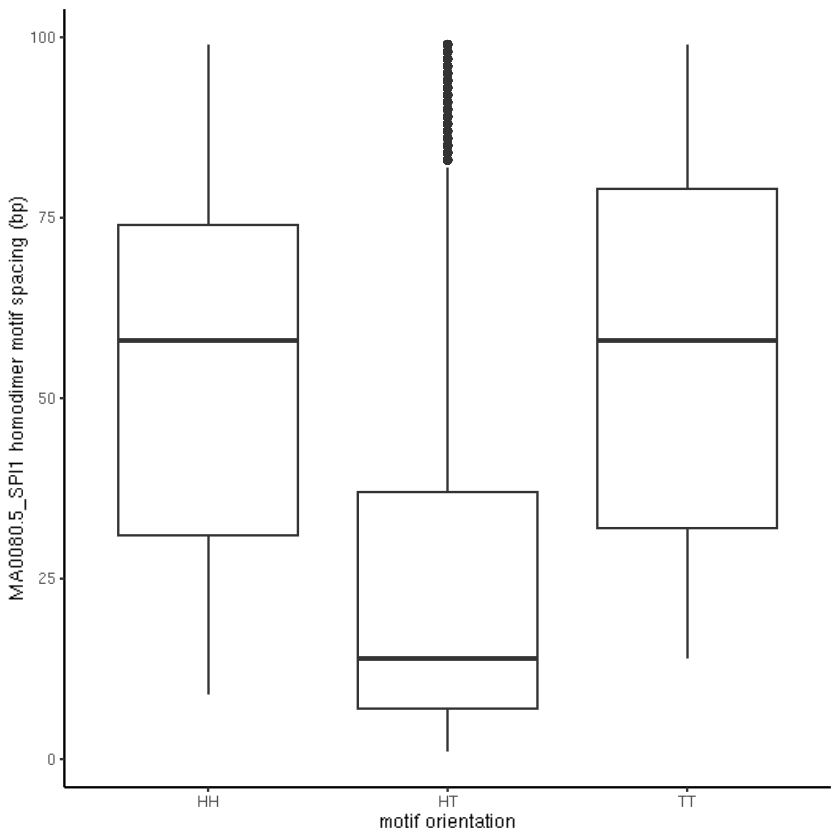

`summarise()` has grouped output by 'mcols.orientation'. You can override using
the `.groups` argument.


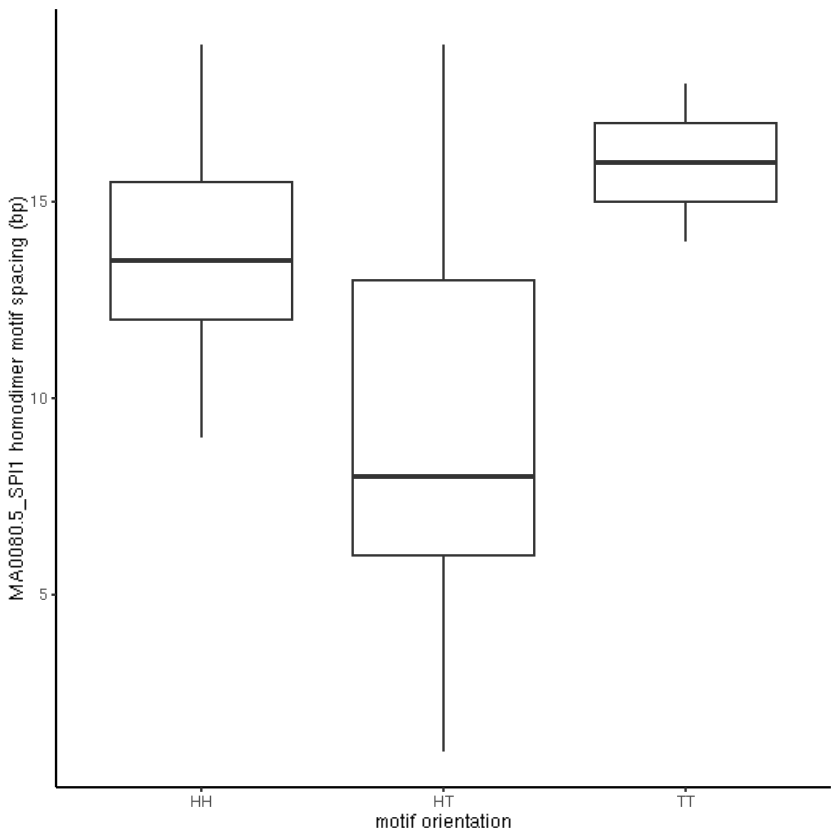

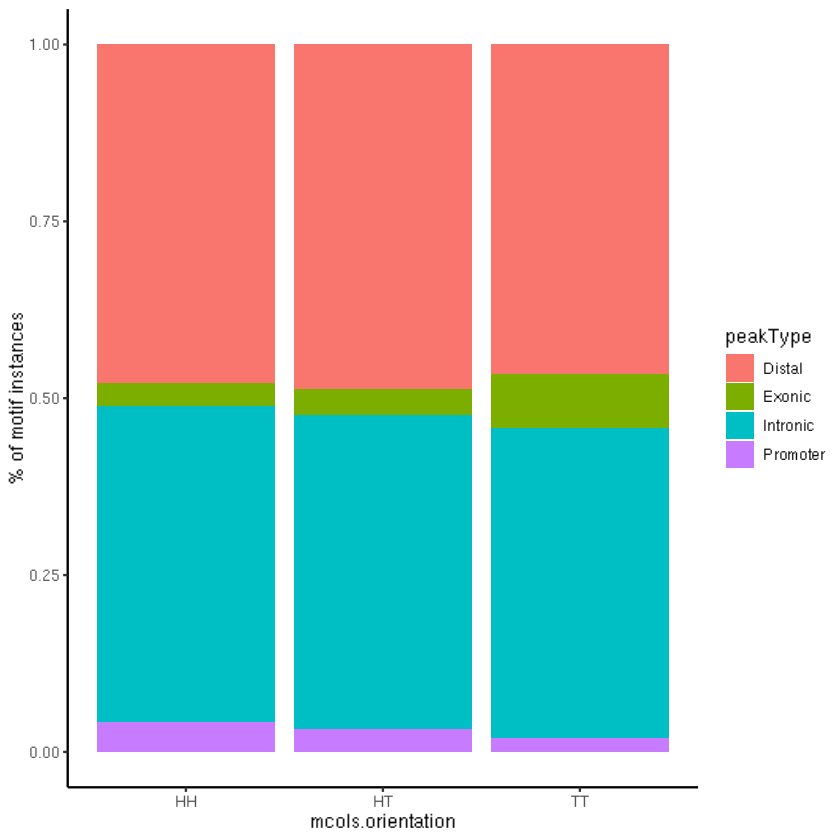

In [67]:
# get filtered list of motif instances and replot the distributions above
q_cutoff <- quantile(top_instance_conspeaks, 0.75)
peaks_anno_norepeats <- peaks_anno[tmp[tmp@from %in% as.integer(top_instance_conspeaks[top_instance_conspeaks<q_cutoff] %>% names)]@to %>% unique]
peaks_anno_norepeats

ggplot(mcols(peaks_anno_norepeats), aes(x=mcols.orientation)) + geom_bar() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer counts")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_count_byorientation_norepeatregion_filterbyhits.pdf"), width=5, height=5)

ggplot(mcols(peaks_anno_norepeats), aes(x=mcols.orientation, y=motif_spacing)) + geom_boxplot() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer motif spacing (bp)")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_motif_spacing_byorientation_norepeatregion_filterbyhits.pdf"), width=5, height=5)

ggplot(mcols(peaks_anno_norepeats) %>% as.data.frame %>% dplyr::filter(motif_spacing<20), aes(x=mcols.orientation, y=motif_spacing)) + geom_boxplot() + theme_classic() + 
    ylab(paste0(motif_code_ls[TF], " homodimer motif spacing (bp)")) + xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_motif_spacing<20_byorientation_norepeatregion_filterbyhits.pdf"), width=5, height=5)

df <- mcols(peaks_anno_norepeats) %>% as.data.frame %>% dplyr::group_by(mcols.orientation, peakType) %>% dplyr::summarise(count=n())
ggplot(df, aes(x=mcols.orientation, y=count, fill=peakType)) + geom_col(position="fill") + theme_classic() + ylab("% of motif instances")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_peaktype_byorientation_norepeatregion_filterbyhits.pdf"), width=5, height=5)

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


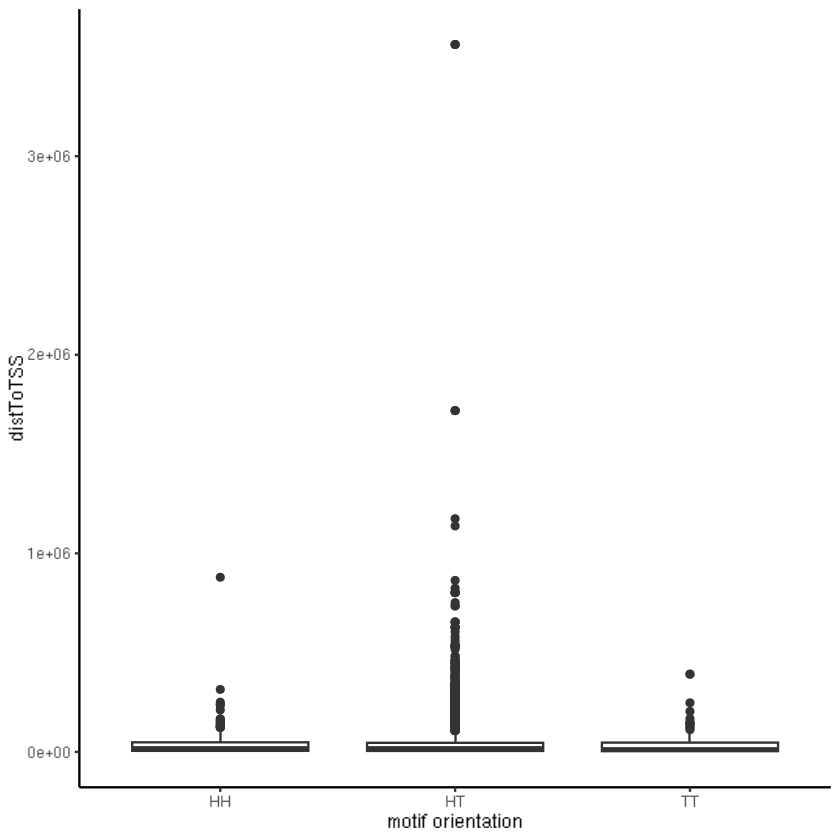

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


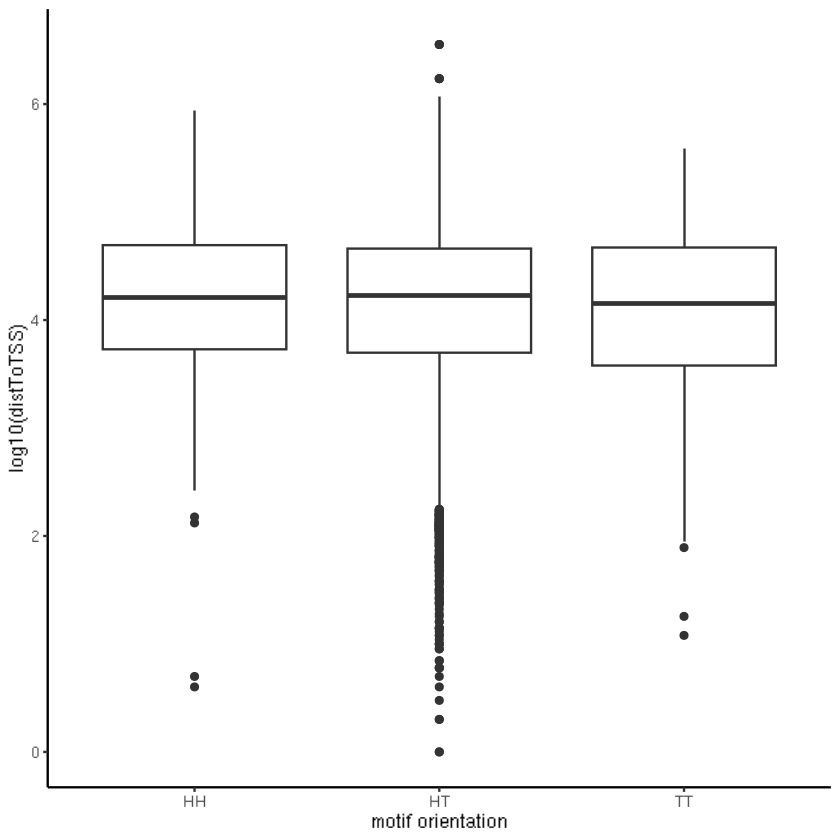

In [72]:
ggplot(mcols(peaks_anno_norepeats) %>% as.data.frame, aes(x=mcols.orientation, y=distToTSS)) + geom_boxplot() + theme_classic() + 
    xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_motif_disttotss_byorientation_norepeatregion_filterbyhits.pdf"), width=5, height=5)

ggplot(mcols(peaks_anno_norepeats) %>% as.data.frame, aes(x=mcols.orientation, y=log10(distToTSS))) + geom_boxplot() + theme_classic() + 
    xlab("motif orientation")
ggsave(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_motif_log10disttotss_byorientation_norepeatregion_filterbyhits.pdf"), width=5, height=5)



### avg cpm

In [ ]:
cpm <- read.table(paste0(base_dir, "/output/02-atac/01/cpm.tsv"))
head(cpm)

# get overlap between consensus peaks and the homodimer motifs
# filter consensus peaks to just the ones overlapping homodimer motif instances to reduce search space for the next step
overlap <- findOverlaps(conspeaks, peaks_anno_norepeats)
sub_conspeaks <- conspeaks[overlap@from %>% unique]
sub_conspeaks

# filter cpm to just columns with TF of interest
subcpm <- cpm[,grep(TF, colnames(cpm), value=T)]
head(subcpm)

In [74]:
# takes 1hr
dose_ls <- c("d100", "d075", "d050", "d025", "d005")
output <- list()

for (i in 1:length(peaks_anno_norepeats)){
    currins <- peaks_anno_norepeats[i]

    overlap <- findOverlaps(currins, sub_conspeaks)
    if (length(overlap@to)>0){ 
        avg <- lapply(dose_ls, function(d){
            df <- subcpm[sub_conspeaks[overlap@to]$name, grep(d, colnames(subcpm), value=T)]
            return(c(d, mean(df %>% unname %>% unlist %>% na.omit)))
        })
        avg <- do.call(rbind, avg) %>% as.data.frame %>% dplyr::rename(dose="V1", avg_cpm="V2")
        avg <- cbind(avg, i, mcols(peaks_anno_norepeats[i]))
        output[[i]] <- avg
    }
}

output <- do.call(rbind, output)
output$avg_cpm <- as.numeric(output$avg_cpm)

head(output, n=10)
saveRDS(output, paste0(outdir, "/", TF, "_cpm_peaks_anno_norepeat_filterbyhits.rds"))

p1 <- ggplot(output, aes(x=mcols.orientation, y=avg_cpm, fill=dose)) + geom_boxplot()
p2 <- ggplot(output, aes(x=mcols.orientation, y=avg_cpm, fill=dose)) + geom_boxplot(outlier.shape=NA) + ylim(0, 10)

p3 <- ggplot(output, aes(fill=mcols.orientation, y=avg_cpm, x=dose)) + geom_boxplot()
p4 <- ggplot(output, aes(fill=mcols.orientation, y=avg_cpm, x=dose)) + geom_boxplot(outlier.shape=NA) + ylim(0, 10)

pdf(paste0(plotdir, "/", TF, "_", motif_code_ls[TF], "_avgcpm_byorientation_bydose_norepeatregion_filterbyhits.pdf"), width=5, height=5)
p1
p2
p3
p4
dev.off()

dose avg_cpm   i mcols.orientation mcols.start_a mcols.start_b mcols.end_a
1  d100 0.5697076 1 HT                1035957       1035965       1035976    
2  d075 0.8261950 1 HT                1035957       1035965       1035976    
3  d050 0.5805660 1 HT                1035957       1035965       1035976    
4  d025 1.5669312 1 HT                1035957       1035965       1035976    
5  d005 0.5678396 1 HT                1035957       1035965       1035976    
6  d100 5.1848718 2 HT                1948896       1948933       1948915    
7  d075 4.3015894 2 HT                1948896       1948933       1948915    
8  d050 3.6463478 2 HT                1948896       1948933       1948915    
9  d025 2.1683876 2 HT                1948896       1948933       1948915    
10 d005 0.6104501 2 HT                1948896       1948933       1948915    
   mcols.end_b mcols.strand_a mcols.strand_b mcols.score_a mcols.score_b
1  1035984     +              +              11.82164      16.90109     
2  1035984     +              +              11.82164      16.90109     
3  1035984     +              +              11.82164      16.90109     
4  1035984     +              +              11.82164      16.90109     
5  1035984     +              +              11.82164      16.90109     
6  1948952     -              -              12.21463      12.63850     
7  1948952     -              -              12.21463      12.63850     
8  1948952     -              -              12.21463      12.63850     
9  1948952     -              -              12.21463      12.63850     
10 1948952     -              -              12.21463      12.63850     
   motif_spacing distToGeneStart nearestGene peakType distToTSS nearestTSS
1   8            15846           AGRN        Intronic  1102     uc057ayv.1
2   8            15846           AGRN        Intronic  1102     uc057ayv.1
3   8            15846           AGRN        Intronic  1102     uc057ayv.1
4   8            15846           AGRN        Intronic  1102     uc057ayv.1
5   8            15846           AGRN        Intronic  1102     uc057ayv.1
6  37            29650           TMEM52      Intronic 11181     uc057bjx.1
7  37            29650           TMEM52      Intronic 11181     uc057bjx.1
8  37            29650           TMEM52      Intronic 11181     uc057bjx.1
9  37            29650           TMEM52      Intronic 11181     uc057bjx.1
10 37            29650           TMEM52      Intronic 11181     uc057bjx.1
   GC     N
1  0.5714 0
2  0.5714 0
3  0.5714 0
4  0.5714 0
5  0.5714 0
6  0.5263 0
7  0.5263 0
8  0.5263 0
9  0.5263 0
10 0.5263 0

Warning message:
“Removed 705 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3737 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 705 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3737 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


png 
  2

## ChromBPNet hits only

In [6]:
# filter 
t <- hits[grepl("ETS", names(hits))] %>% unlist
head(t)

GRanges object with 6 ranges and 3 metadata columns:
                          seqnames        ranges strand |
                             <Rle>     <IRanges>  <Rle> |
  pos_patterns.ETS_single     chr1 778914-778919      + |
  pos_patterns.ETS_single     chr1 779902-779907      - |
  pos_patterns.ETS_single     chr1 827335-827340      + |
  pos_patterns.ETS_single     chr1 827513-827518      + |
  pos_patterns.ETS_single     chr1 827764-827769      + |
  pos_patterns.ETS_single     chr1 876632-876637      + |
                                            name     score
                                     <character> <numeric>
  pos_patterns.ETS_single pos_patterns.ETS_sin..   694.038
  pos_patterns.ETS_single pos_patterns.ETS_sin..   856.465
  pos_patterns.ETS_single pos_patterns.ETS_sin..   801.621
  pos_patterns.ETS_single pos_patterns.ETS_sin..   870.609
  pos_patterns.ETS_single pos_patterns.ETS_sin..   928.607
  pos_patterns.ETS_single pos_patterns.ETS_sin..   787.055
           

In [7]:
# annotate hit/peak type
library(BSgenome.Hsapiens.UCSC.hg38)
library(ArchR)
addArchRGenome("hg38")
geneAnnot <- getArchRGenome(geneAnnotation = T, genomeAnnotation = F) %>% as.list
hits_anno <- ArchR:::.fastAnnoPeaks(t, BSgenome = BSgenome.Hsapiens.UCSC.hg38, geneAnnotation = geneAnnot)
saveRDS(hits_anno, paste0(outdir, "/", TF, "_matches_chrombphits.rds"))

Setting default genome to Hg38.

Using GeneAnnotation set by addArchRGenome(Hg38)!

Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



In [5]:
hits_anno <- readRDS(paste0(outdir, "/", TF, "_matches_chrombphits.rds"))

`summarise()` has grouped output by 'motif'. You can override using the
`.groups` argument.


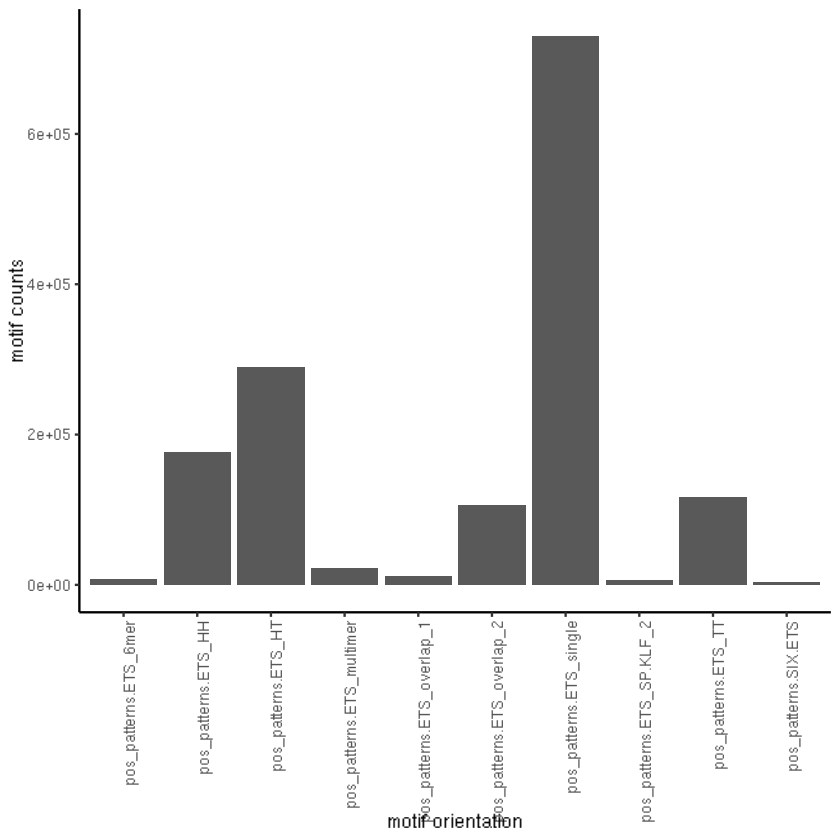

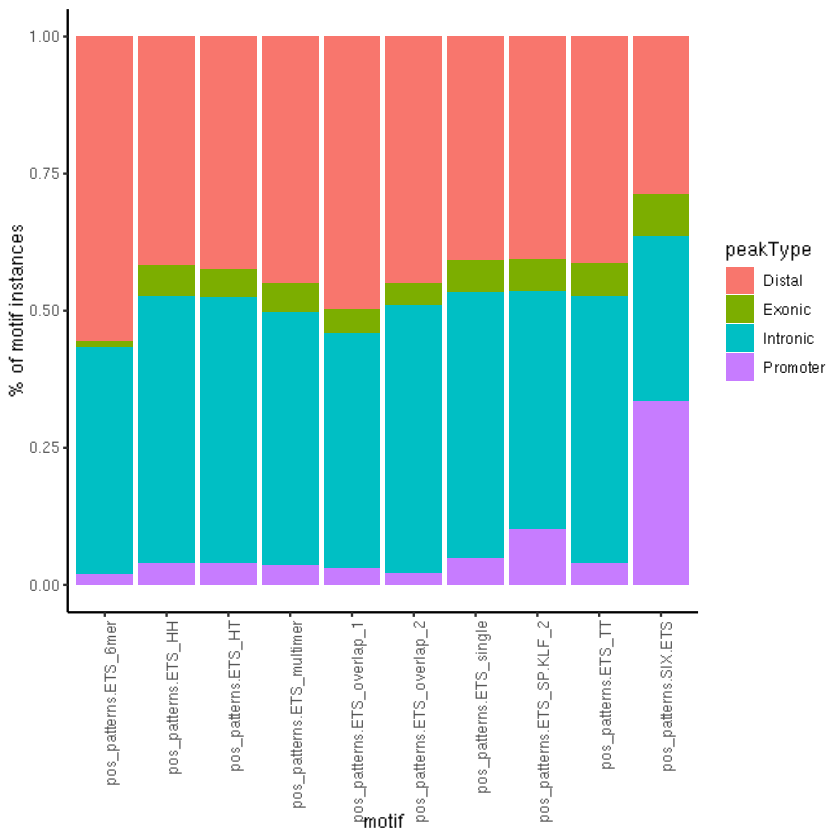

In [11]:
ggplot(mcols(hits_anno), aes(x=motif)) + geom_bar() + theme_classic() + 
    ylab("motif counts") + xlab("motif orientation") + theme(axis.text.x=element_text(angle=90, hjust=1))
ggsave(paste0(plotdir, "/", TF, "_count_byorientation_chrombphits.pdf"), width=5, height=5) 


df <- mcols(hits_anno) %>% as.data.frame %>% dplyr::group_by(motif, peakType) %>% dplyr::summarise(count=n())
ggplot(df, aes(x=motif, y=count, fill=peakType)) + geom_col(position="fill") + theme_classic() + 
    ylab("% of motif instances")  + theme(axis.text.x=element_text(angle=90, hjust=1))
ggsave(paste0(plotdir, "/", TF, "_peaktype_byorientation_chrombphits.pdf"), width=5, height=5)

### avg cpm

In [ ]:
cpm <- read.table(paste0(base_dir, "/output/02-atac/01/cpm.tsv"))
head(cpm)

In [9]:
# get overlap between consensus peaks and the homodimer motifs
# filter consensus peaks to just the ones overlapping homodimer motif instances to reduce search space for the next step
overlap <- findOverlaps(conspeaks, hits_anno)
sub_conspeaks <- conspeaks[overlap@from %>% unique]
sub_conspeaks

# filter cpm to just columns with TF of interest
subcpm <- cpm[,grep(TF, colnames(cpm), value=T)]
head(subcpm)

GRanges object with 426454 ranges and 2 metadata columns:
           seqnames              ranges strand |                   name
              <Rle>           <IRanges>  <Rle> |            <character>
       [1]     chr1       778479-778981      * | HEK293T_P3A12_GFP_d1..
       [2]     chr1       779566-780068      * | HEK293T_P1B6_SP4_d00..
       [3]     chr1       826547-827049      * | HEK293T_P3G7_SPI1_d1..
       [4]     chr1       827290-827792      * | HEK293T_P3F10_SPI1_d..
       [5]     chr1       838242-838744      * | HEK293T_P2E11_TCF3_d..
       ...      ...                 ...    ... .                    ...
  [426450]     chrX 155644324-155644826      * | HEK293T_P3C3_KLF4_d0..
  [426451]     chrX 155656934-155657436      * | HEK293T_P3E2_KLF1_d1..
  [426452]     chrX 155657577-155658079      * | HEK293T_P3C3_KLF4_d0..
  [426453]     chrX 155662296-155662798      * | HEK293T_P3A12_GFP_d1..
  [426454]     chrX 155687335-155687837      * | HEK293T_P2D8_ALX4_d0..
      

X373_HEK293T_P3E7_SPI1_d100
HEK293T_P3A12_GFP_d100_peak_1   2.384648                   
HEK293T_P3A12_GFP_d100_peak_17  9.538592                   
HEK293T_P3G8_SPI1_d075_peak_6   1.490405                   
HEK293T_P1B6_SP4_d005_peak_3    0.894243                   
HEK293T_P3G7_SPI1_d100_peak_10  4.471215                   
HEK293T_P3F10_SPI1_d025_peak_18 3.278891                   
                                X374_HEK293T_P3F7_SPI1_d100
HEK293T_P3A12_GFP_d100_peak_1    1.775720                  
HEK293T_P3A12_GFP_d100_peak_17  11.009465                  
HEK293T_P3G8_SPI1_d075_peak_6    0.355144                  
HEK293T_P1B6_SP4_d005_peak_3     1.420576                  
HEK293T_P3G7_SPI1_d100_peak_10   5.327160                  
HEK293T_P3F10_SPI1_d025_peak_18  3.551440                  
                                X375_HEK293T_P3G7_SPI1_d100
HEK293T_P3A12_GFP_d100_peak_1   2.013739                   
HEK293T_P3A12_GFP_d100_peak_17  8.917989                   
HEK293T_P3G8_SPI1_d075_peak_6   2.876771                   
HEK293T_P1B6_SP4_d005_peak_3    2.013739                   
HEK293T_P3G7_SPI1_d100_peak_10  5.178187                   
HEK293T_P3F10_SPI1_d025_peak_18 2.301417                   
                                X376_HEK293T_P3H7_SPI1_d100
HEK293T_P3A12_GFP_d100_peak_1   0.6847034                  
HEK293T_P3A12_GFP_d100_peak_17  8.4446756                  
HEK293T_P3G8_SPI1_d075_peak_6   1.8258758                  
HEK293T_P1B6_SP4_d005_peak_3    1.3694069                  
HEK293T_P3G7_SPI1_d100_peak_10  5.0211585                  
HEK293T_P3F10_SPI1_d025_peak_18 4.1082206                  
                                X381_HEK293T_P3E8_SPI1_d075
HEK293T_P3A12_GFP_d100_peak_1   2.257505                   
HEK293T_P3A12_GFP_d100_peak_17  7.901266                   
HEK293T_P3G8_SPI1_d075_peak_6   1.881254                   
HEK293T_P1B6_SP4_d005_peak_3    1.128752                   
HEK293T_P3G7_SPI1_d100_peak_10  6.020012                   
HEK293T_P3F10_SPI1_d025_peak_18 2.257505                   
                                X382_HEK293T_P3F8_SPI1_d075
HEK293T_P3A12_GFP_d100_peak_1   2.760732                   
HEK293T_P3A12_GFP_d100_peak_17  8.282197                   
HEK293T_P3G8_SPI1_d075_peak_6   3.105824                   
HEK293T_P1B6_SP4_d005_peak_3    2.415641                   
HEK293T_P3G7_SPI1_d100_peak_10  3.796007                   
HEK293T_P3F10_SPI1_d025_peak_18 3.450915                   
                                X383_HEK293T_P3G8_SPI1_d075
HEK293T_P3A12_GFP_d100_peak_1   2.9444773                  
HEK293T_P3A12_GFP_d100_peak_17  9.6747110                  
HEK293T_P3G8_SPI1_d075_peak_6   3.3651169                  
HEK293T_P1B6_SP4_d005_peak_3    0.8412792                  
HEK293T_P3G7_SPI1_d100_peak_10  5.0476753                  
HEK293T_P3F10_SPI1_d025_peak_18 3.7857565                  
                                X384_HEK293T_P3H8_SPI1_d075
HEK293T_P3A12_GFP_d100_peak_1   1.3828691                  
HEK293T_P3A12_GFP_d100_peak_17  9.3343663                  
HEK293T_P3G8_SPI1_d075_peak_6   2.7657382                  
HEK293T_P1B6_SP4_d005_peak_3    0.3457173                  
HEK293T_P3G7_SPI1_d100_peak_10  4.1486073                  
HEK293T_P3F10_SPI1_d025_peak_18 3.8028900                  
                                X389_HEK293T_P3E9_SPI1_d050
HEK293T_P3A12_GFP_d100_peak_1   2.609116                   
HEK293T_P3A12_GFP_d100_peak_17  7.305524                   
HEK293T_P3G8_SPI1_d075_peak_6   1.043646                   
HEK293T_P1B6_SP4_d005_peak_3    1.565469                   
HEK293T_P3G7_SPI1_d100_peak_10  3.652762                   
HEK293T_P3F10_SPI1_d025_peak_18 3.652762                   
                                X390_HEK293T_P3F9_SPI1_d050
HEK293T_P3A12_GFP_d100_peak_1   2.414759                   
HEK293T_P3A12_GFP_d100_peak_17  9.659036                   
HEK293T_P3G8_SPI1_d075_peak_6   2.012299                   
HEK293T_P1B6

In [10]:
# didn't finish after 16h...
dose_ls <- c("d100", "d075", "d050", "d025", "d005")
output <- list()

for (i in 1:length(hits_anno)){
    currins <- hits_anno[i]

    overlap <- findOverlaps(currins, sub_conspeaks)
    if (length(overlap@to)>0){ 
        avg <- lapply(dose_ls, function(d){
            df <- subcpm[sub_conspeaks[overlap@to]$name, grep(d, colnames(subcpm), value=T)]
            return(c(d, mean(df %>% unname %>% unlist %>% na.omit)))
        })
        avg <- do.call(rbind, avg) %>% as.data.frame %>% dplyr::rename(dose="V1", avg_cpm="V2")
        avg <- cbind(avg, i, mcols(hits_anno[i]))
        output[[i]] <- avg
    }
}

output <- do.call(rbind, output)
output$avg_cpm <- as.numeric(output$avg_cpm)

head(output, n=10)
saveRDS(output, paste0(outdir, "/", TF, "_cpm_hits_anno_chrombphits.rds"))

p1 <- ggplot(output, aes(x=motif, y=avg_cpm, fill=dose)) + geom_boxplot() + theme(axis.text.x=element_text(angle=90, hjust=1))
p2 <- ggplot(output, aes(x=motif, y=avg_cpm, fill=dose)) + geom_boxplot(outlier.shape=NA) + ylim(0, 10) + theme(axis.text.x=element_text(angle=90, hjust=1))

p3 <- ggplot(output, aes(fill=motif, y=avg_cpm, x=dose)) + geom_boxplot() + theme(axis.text.x=element_text(angle=90, hjust=1))
p4 <- ggplot(output, aes(fill=motif, y=avg_cpm, x=dose)) + geom_boxplot(outlier.shape=NA) + ylim(0, 10) + theme(axis.text.x=element_text(angle=90, hjust=1))

pdf(paste0(plotdir, "/", TF, "_avgcpm_byorientation_bydose_chrombphits.pdf"), width=5, height=5)
p1
p2
p3
p4
dev.off()

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis